# Machine-aided detection of sources in Jinpingmei

 ### Withheld for review

[![cc-by](https://licensebuttons.net/l/by/4.0/88x31.png)](https://creativecommons.org/licenses/by/4.0/) 
©Witheld for Review. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY](https://creativecommons.org/licenses/by/4.0/)


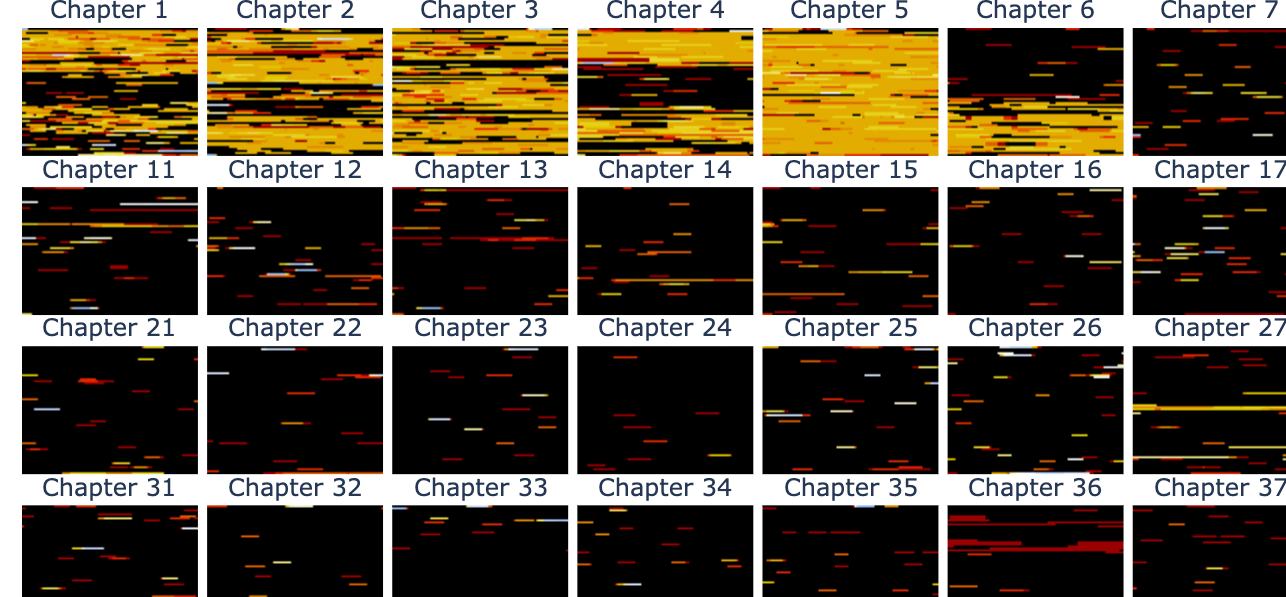

In [29]:
from IPython.display import Image, display

display(Image("./media/cover.png"))

textual history, source detection, machine learning, digital humanities, ming dynasty fiction, chinese fiction

The infamous late sixteenth century novel _Jinpingmei_ (_Plum in the Golden Vase_) is famed for its extensive intertextuality and complex appropriation of earlier cultural material. The pseudonymous author of _Jinpingmei_ spins a masterful and highly pornographic story out of a brief episode from an earlier novel the Water Margin and peppers the adapted narrative with intrusions of material from a dizzying array of external works with seemingly no regard for the boundaries of genre. This complex intertextual landscape has attracted the attention of scholars in the hundreds of years since the novel first began to circulate, but now computational methods enable us to systematically reconstruct the novel’s textual origins. In this paper, I use a two-step methodology to broaden our understanding of this intertextuality. First, I use a method adapted from bio-informatics to compare the novel against a large corpus of premodern literary materials to identify all instances where material in the novel overlaps with other texts. Then I build machine-learning based text classifiers to identify the likely textual origin of each instance, using the intuition that materials endogenous to _Jinpingmei_ will be more stylistically similar to the rest of the novel than external materials (and conversely, that external materials will more greatly resemble the external work than _Jinpingmei_). Through this piece, I demonstrate the value of machine-aided detection of source material when working with complex textual artifacts like _Jinpingmei_ and comment on the broader applicability of these methods to literary and historical textual artifacts from China.

## Introduction

The earliest extant edition of the late Ming novel _Jinpingmei_ 金瓶梅 (_Plum in the Golden Vase_) known as the _cihua_ 詞話 or Wanli 萬曆 edition, hereafter _Jinpingmei_, opens not with original material, but with a reference to an older ci lyric poem: 

> The hero grips his “Hook of Wu.” Eager to cut off ten thousand heads. How is it that a heart forged out of iron and stone, can yet be melted by a flower? Just take a look at Hsiang Yü and Liu Pang: Both cases are equally distressing. They only had to meet with Yü-chi and Lady Ch’i for all their valor to come to naught.” (<cite data-cite="7306679/X6CT5F9A"></cite>, 12)
詞曰：「丈夫只手把吳鉤，欲斬萬人頭。如何鐵石打成心性，卻為花柔。請看項籍並劉季，一似使人愁；只因撞著虞姬戚氏，豪傑都休。」

Widely viewed as a masterpiece and one of the most important and innovative works in the Chinese literary tradition, the anonymously written _Jinpingmei_ was unique, experimental, and extremely controversial. The novel touches on myriad social, political, religious, and moral issues through the lens of a pornographic story and is viewed as an important allegory lampooning late Ming society. Yet despite the novel’s unique place in Chinese literary history, this very first passage, and significant portions of the novel as a whole, is not original. As Patrick Hanan points out, this same lyric poem with only very minor differences can be found in the late fifteenth century Hong Pian’s 洪楩Qingpingshan huaben 清平山堂話本, a collection short stories referenced throughout _Jinpingmei_.(<cite data-cite="7306679/JIV3M8QJ"></cite>, 25)  Critically for Hanan’s argument, it is not just the poem that is copied; the explanation for the poem that immediately follows is also reproduced nearly verbatim:

> The subject of this lyric is the words passion and beauty, two concepts that are related to each other as substance is to function. Thus, when beauty bedazzles the eye, passion is born in the heart. Passion and beauty evoke from ancient times until the present day, gentlemen of moral cultivation ought never to forget. As two men of the Chin dynasty once said, “It is people just like ourselves who are most affected by passion.(<cite data-cite="7306679/X6CT5F9A"></cite>, 12)
此一只詞兒上詩詞各一首，單說著情色二字，乃一體一用也。故色絢於目，情感於心，情色相生，心目相視。雖亙古及迄今，仁人君子，弗合能忘之。晉人云：「情之所鍾，正在我輩。」 

Patrick Hanan uses this as evidence that the author of _Jinpingmei_ was almost certainly copying the Wenjing yuanyang hui刎頸鴛鴦會 short story within Qingpingshan, though this story in turn owes parts of its composition to even older works; buried within this short section of text are references to older materials from the Song, Yuan, and Ming dynasties.

The novel passes from this relatively short instance of intertextuality to a more widely recognized, and much longer, adaptation of material from the novel _Shuihu zhuan_ 水滸傳 (_The Water Margin_).[^1] _Shuihu zhuan’s_ influence on _Jinpingmei_ is both extensively documented and clearly controversial for late imperial readers. Later editions of the novel, such as the much more popular Chongzhen edition, significantly reframe the relationship between the two novel by excising or editing large amounts of the shared text. 

The _cihua_ edition of the novel exists within a complex cultural and literary tradition and opening the novel with recycled material immediately primes the reader to expect such moves throughout the work and situates. The complex intertextual references within _Jinpingmei_ are in fact so dense that well over five percent of the novel derives from earlier sources.

Contemporary readers would have been steeped in the quoted works, and these references would have likely elicited a variety of responses dependent on knowledge of the earlier works. Yet even they clearly found this material difficult, and very few modern readers have enough insight into the sources to fully appreciate the effect they have on the novel. Following the permutations of textual adaptation within the novel offers a deeper understanding of the work, but it is an arduous process that requires an extremely in-depth knowledge of the works circulating when _Jinpingmei_ was written. _Jinpingmei’s_ role an exemplar in the art of textual appropriation, makes it a perfect test case for developing digital methods for automatic detection of intertextuality and disambiguation of sources. Patrick Hanan’s 1963 article “Sources of the Chin P’ing Mei” is a masterclass in textual scholarship, in which he identifies many of the works directly copied within the novel. But digital methods and materials open the door to such detailed scholarship much more widely. Critically, they allow me to generate a generalizable approach that works beyond the case of _Jinpingmei_ that may be valuable in studying all manner of literary and historical materials.
In this article, I discuss experiments I have been conducting in leveraging digital corpora to computationally identifying textual antecedents. In so doing I will reveal more about the nature of _Jinpingmei_ as a heteroglossic, intertextual work while creating tools useful for studying textual sources. These tools have the potential to rapidly expand the study of source materials in Chinese corpora. The work in this article is also leading into a future study of the stylistic nature of _Jinpingmei_ that illustrates how intertextuality and reliance on materials of multiple different genres influences the style of the novel. 

[^1]: Which edition is some matter of debate, and Hanan argues that the edition the author of the cihua edition of Jinpingmei was adapting from is distinct from any currently extant version.

## Acquiring and prepping the corpus

The quality of any large-scale textual analysis is dependent on the digital corpus that undergirds the research. It is only thanks to work done by people who have digitized a large portion of Imperial Chinese writing that it is now possible to leverage computational analysis to understand the works that influence any given text on a macro scale. I base the analysis in this paper on digitized texts derived from a number of online repositories: the Kanseki repository (<cite data-cite="7306679/DQWSWW9F"></cite>),  the Daizhige repository (<cite data-cite="7306679/FKPTBEI3"></cite>),  Chinese Wikisource (<cite data-cite="7306679/W6A6XI55"></cite>),  as well as a number of other open-source collections including Project Gutenberg (<cite data-cite="7306679/BH5CH376"></cite>) and _Kaifang wenxue_ (<cite data-cite="7306679/F35QNXA6"></cite>).[^1]

I first clean the texts in order to facilitate the identification of shared textual materials across different digital corpora. This involves removing materials not likely present in the original works, from punctuation to errant HTML. I also normalize the Chinese character sets across documents by transforming the texts into simplified characters.[^2]  I removed duplicate materials in cases where a particular edition of a text exists as multiple _digital_ copies across this corpus, but I do retain different editions of texts if they represent a unique printed piece.[^3] For most of the analysis, I also ensured that I have a rough date of composition for every text.[^4] 

Given that my primary focus is on identifying the sources of _Jinpingmei_, simply knowing if a text that shares material with _Jinpingmei_ was written before the novel is enough to establish that the materials is not original to _Jinpingmei_, though not necessarily to identify its ultimate origin. As such, dating the works in the corpus becomes critical.[^5]  In including materials written before, concurrently to, and after _Jinpingmei_, I can get a deep view into its influences as well as the impact it has on later materials. In the end, the analysis corpus I use consists of 20,637 texts totaling around 1.58 billion characters.

The quality of the corpus heavily influences the apparent results of any corpus-based research. The results could be influenced by transcription errors, for example. When comparing two different editions of the same work, it is important to remember that many of the differences might have been introduced by modern digitizers and may not completely reflect the original works. However, given the breadth of analysis, as long as the transcription errors are not systematically biased in some way, they should not have significant influence on the results at hand. 
It is also the case that the scope of analysis is limited by works represented within the corpus: I am often able to trace the likely source of a given chunk of text but I can only go as far back as the corpus allows, and it is entirely possible that the ultimate source is not represented.[^6]  Still, the material represented by the corpus here offers an excellent starting place for comprehensively studying source material.


[^1]: A copy of the entire contents of Chinese Wikisource can be downloaded from the Wikimedia database dump website at https://dumps.wikimedia.org/backup-index.html

[^2]: This is necessary because the corpus consists of materials in both traditional and simplified character sets. Ideally I would transform the simplified documents into traditional ones. However, because a significant number of traditional characters were simplified from multiple characters into a single simplified graph, it is difficult to automatically transform a simplified text into a traditional one. As such going in the other direction ensures a uniform, determinative character set.

[^3]: So I do include multiple versions of _Shuihu zhuan_ in this analysis.

[^4]: In cases where it is not clear what dynasty a work is from, I still conduct the intertextual search across the material but leave it out of the bulk of analysis. I also excluded all editions of the _Jinpingmei_ from the comparative corpus to simplify the analysis.

[^5]: While the exact date of writing of _Jinpingmei_ is not clear, it was almost certainly written in the second half of the sixteenth century and finished by at least 1606, when we have evidence of full copies of manuscript versions of the text circulating. Shen Defu discusses the existence of a number of full copies of the manuscript in the _Wanli yehuo bian_ 萬曆野獲編, referring to an incident that occurred in 1606 in which he discussed the novel with Yuan Hongdao. Shen references a complete copy owned by Xu Wenzhen (1503-1583), pushing likely completion back to at least the late sixteenth century. <cite data-cite="7306679/MB79B7AA"></cite>

[^6]: I hypothesize that in such cases the text classifiers I develop may not work as well as in cases where the actual source material is represented.

## Identifying Intertexuality

The first step in computationally identifying the sources of Jinpingmei is to compare the novel against all materials within the corpus. While it is relatively simple to identify sections of text which are direct quotations, often the original is not preserved exactly, the author of _Jinpingmei_ clearly felt at liberty to edit materials he incorporated in the novel. As such, I use an algorithm based on bioinformatic’s Basic Local Alignment Search Tool (BLAST) to ensure that as long as there is a set amount of similarity between _Jinpingmei_ and the comparison text, I can identify all shared material. I look for all sequences of at least ten sequential characters in the Jinpingmei that are at least 80 percent the same as sequences of text found in works in the target corpus.[^1]  While the exact parameters I use for searching are somewhat arbitrary, I arrived at these in an attempt to find a balance between noise and comprehensive results.[^2] The shorter and less similar a sequence I allow, the more likely I will find random, rather than meaningful, instances of reuse. Longer and stricter parameters generate less noisy results but often miss interesting cases of reuse. A search using these 10 character, 80 percent parameters identifies approximately 537,000 cases of textual reuse in the corpus, involving 13,300 unique quotes across 4,500 unique texts.[^3] Some of these instances are short and extremely common; some ten characters sequences appear dozens of times per text across hundreds of texts. Others are long and uncommon, spaning of hundreds of characters and shared only with one other text in the corpus.

Following the identification of these instances of textual reuse, I sort them into multiple categories: text that represents structural language inherent to a given genre, text from works that predate Jinpingmei, text from works roughly contemporary with _Jinpingmei_, text from works that postdate _Jinpingmei_, and text from works of unknown date. This basic categorization schema then lets me delve into the influences on, and of, _Jinpingmei_. To do so I using tools derived from stylometric analysis and machine-learning to develop text classification models that establish the likely origin of textual material. I first establish the efficacy of such models and their potential pitfalls by testing them on a variety of known cases: the _Qingpingshantang huaben_, Li Kaixian’s _Cinue_ 詞謔, and _Shuihu zhuan_, before then attempting to ascertain the likely origin of contemporary and unknown materials.

[^1]: This 80 percent similarity is calculated using Levenshtein distance, which essentially measures the edit distance between two strings. That is, how many edits are needed to change one string into another. So for a 10 character string, 2 edits are allowable. For a 100 character string, 20 are allowable, and so on. This method, and the software that implements it, is described in Vierthaler and Geleen, 2019. <cite data-cite="7306679/Q5RWL8KK"></cite>. Because of the complexity of the code and slow speed of processing, I have elected to include the output in the data folder rather than including the code here.

[^2]: Or to use the more common phrasing in computer science, I need to balance precision and recall.

[^3]: Note that this approach does not capture extensive paraphrasing or allusions. While it would be very useful to capture such things, they are much more complex to identify.

## The nature of intertextuality in _Jinpingmei_

Endeavoring to computationally identify meaningful text reuse in _Jinpingmei_ necessitates a careful look at what types of language are generally repeated throughout Chinese literature. While the raw results of the intertextuality analysis are comprehensive,[^1]  they are not particularly illuminating in and of themselves. The first major concern has to do with the sensitivity of the algorithm to stock or structural phrases. The single most commonly repeated phrase in the results occurs over 480,000 times and is some variation or another of “to learn what happens next, listen to the explanation in the following chapter.[^2]” Fortunately, these oft-repeated phrases are relatively easy to identify and filter out as structural components of text not meaningful in terms of textual influence.

Other phrases also attract prominent attention in view of this study. “Like this and like that 如此如此這般這般” appears thirteen times within _Jinpingmei_ and generates over 3,500 results. Some phrases are rarer, appearing only a single time in _Jinpingmei_ but are used widely across the corpus. These include “to dance about 手之舞之足之蹈之” and numerous references to various official titles. There are also patterns common in _Jinpingmei_ that don’t bear significant repeating across the corpus, usually combinations of the names of certain people or the rather infamous “If Xi’men Qing had not heard that would be the end of it, but he heard 西門慶不聽便罷聽了.”

The extent to which quotes are layered is also a complicating factor, as is evident in the opening anecdote of this article. Detecting which of the multiple texts in which a quote appears is the actual source can be difficult. To a certain extent, it is unknowable without commentary directly from the author. It is also difficult to know how we might computationally identify the ultimate origin of the material, which should be understood in contrast with the proximal origin of the material for the author of _Jinpingmei_ (as these are not necessarily the same thing). The opening text from the _Qingpingshantang huaben_ appears in multiple other places, but like Hanan we can assume that the longest of one of the overlapping quotes is the likely progenitor. I will return to this later in the article when the implications are clearer.

I can easily rule out texts that appear after the early circulation of the _Jinpingmei_ as possible sources. However, given that I only have a general sense of when in the latter part of the sixteenth century _Jinpingmei_ was written, it is more difficult to assess contemporary texts. I can also assume that in at least some cases of quotations overlapping with, but not being completely encompassed by distinct quotations from earlier periods, it may be a likely case of a later work quoting from _Jinpingmei_. This phenomenon is very evident if one observes texts that clearly quote the _Jinpingmei_, such as Ling Mengchu or Feng Menglong’s various short story collections, where the textual overlap does not make intuitive sense as a layered quotation from completely earlier material.
The overall picture of intertextual sharing, including earlier, contemporary, and later materials is as appears in Figure 1.[^3]

[^1]: At least to the extent that they account for all instances of reuse within the corpus at hand. They obviously cannot account for instances of reuse when they occur in texts not represented within the corpus.

[^2]: This shows the exponential nature of this type of analysis: the phrase appears nearly 100 times in _Jinpingmei_. If it also appears 100 times in another novel, then it will be picked up 10,000 times.

[^3]: Discounting only later versions of Jinpingmei itself. When the Chongzhen edition of the novel is also included the majority of the novel then appears in later works.

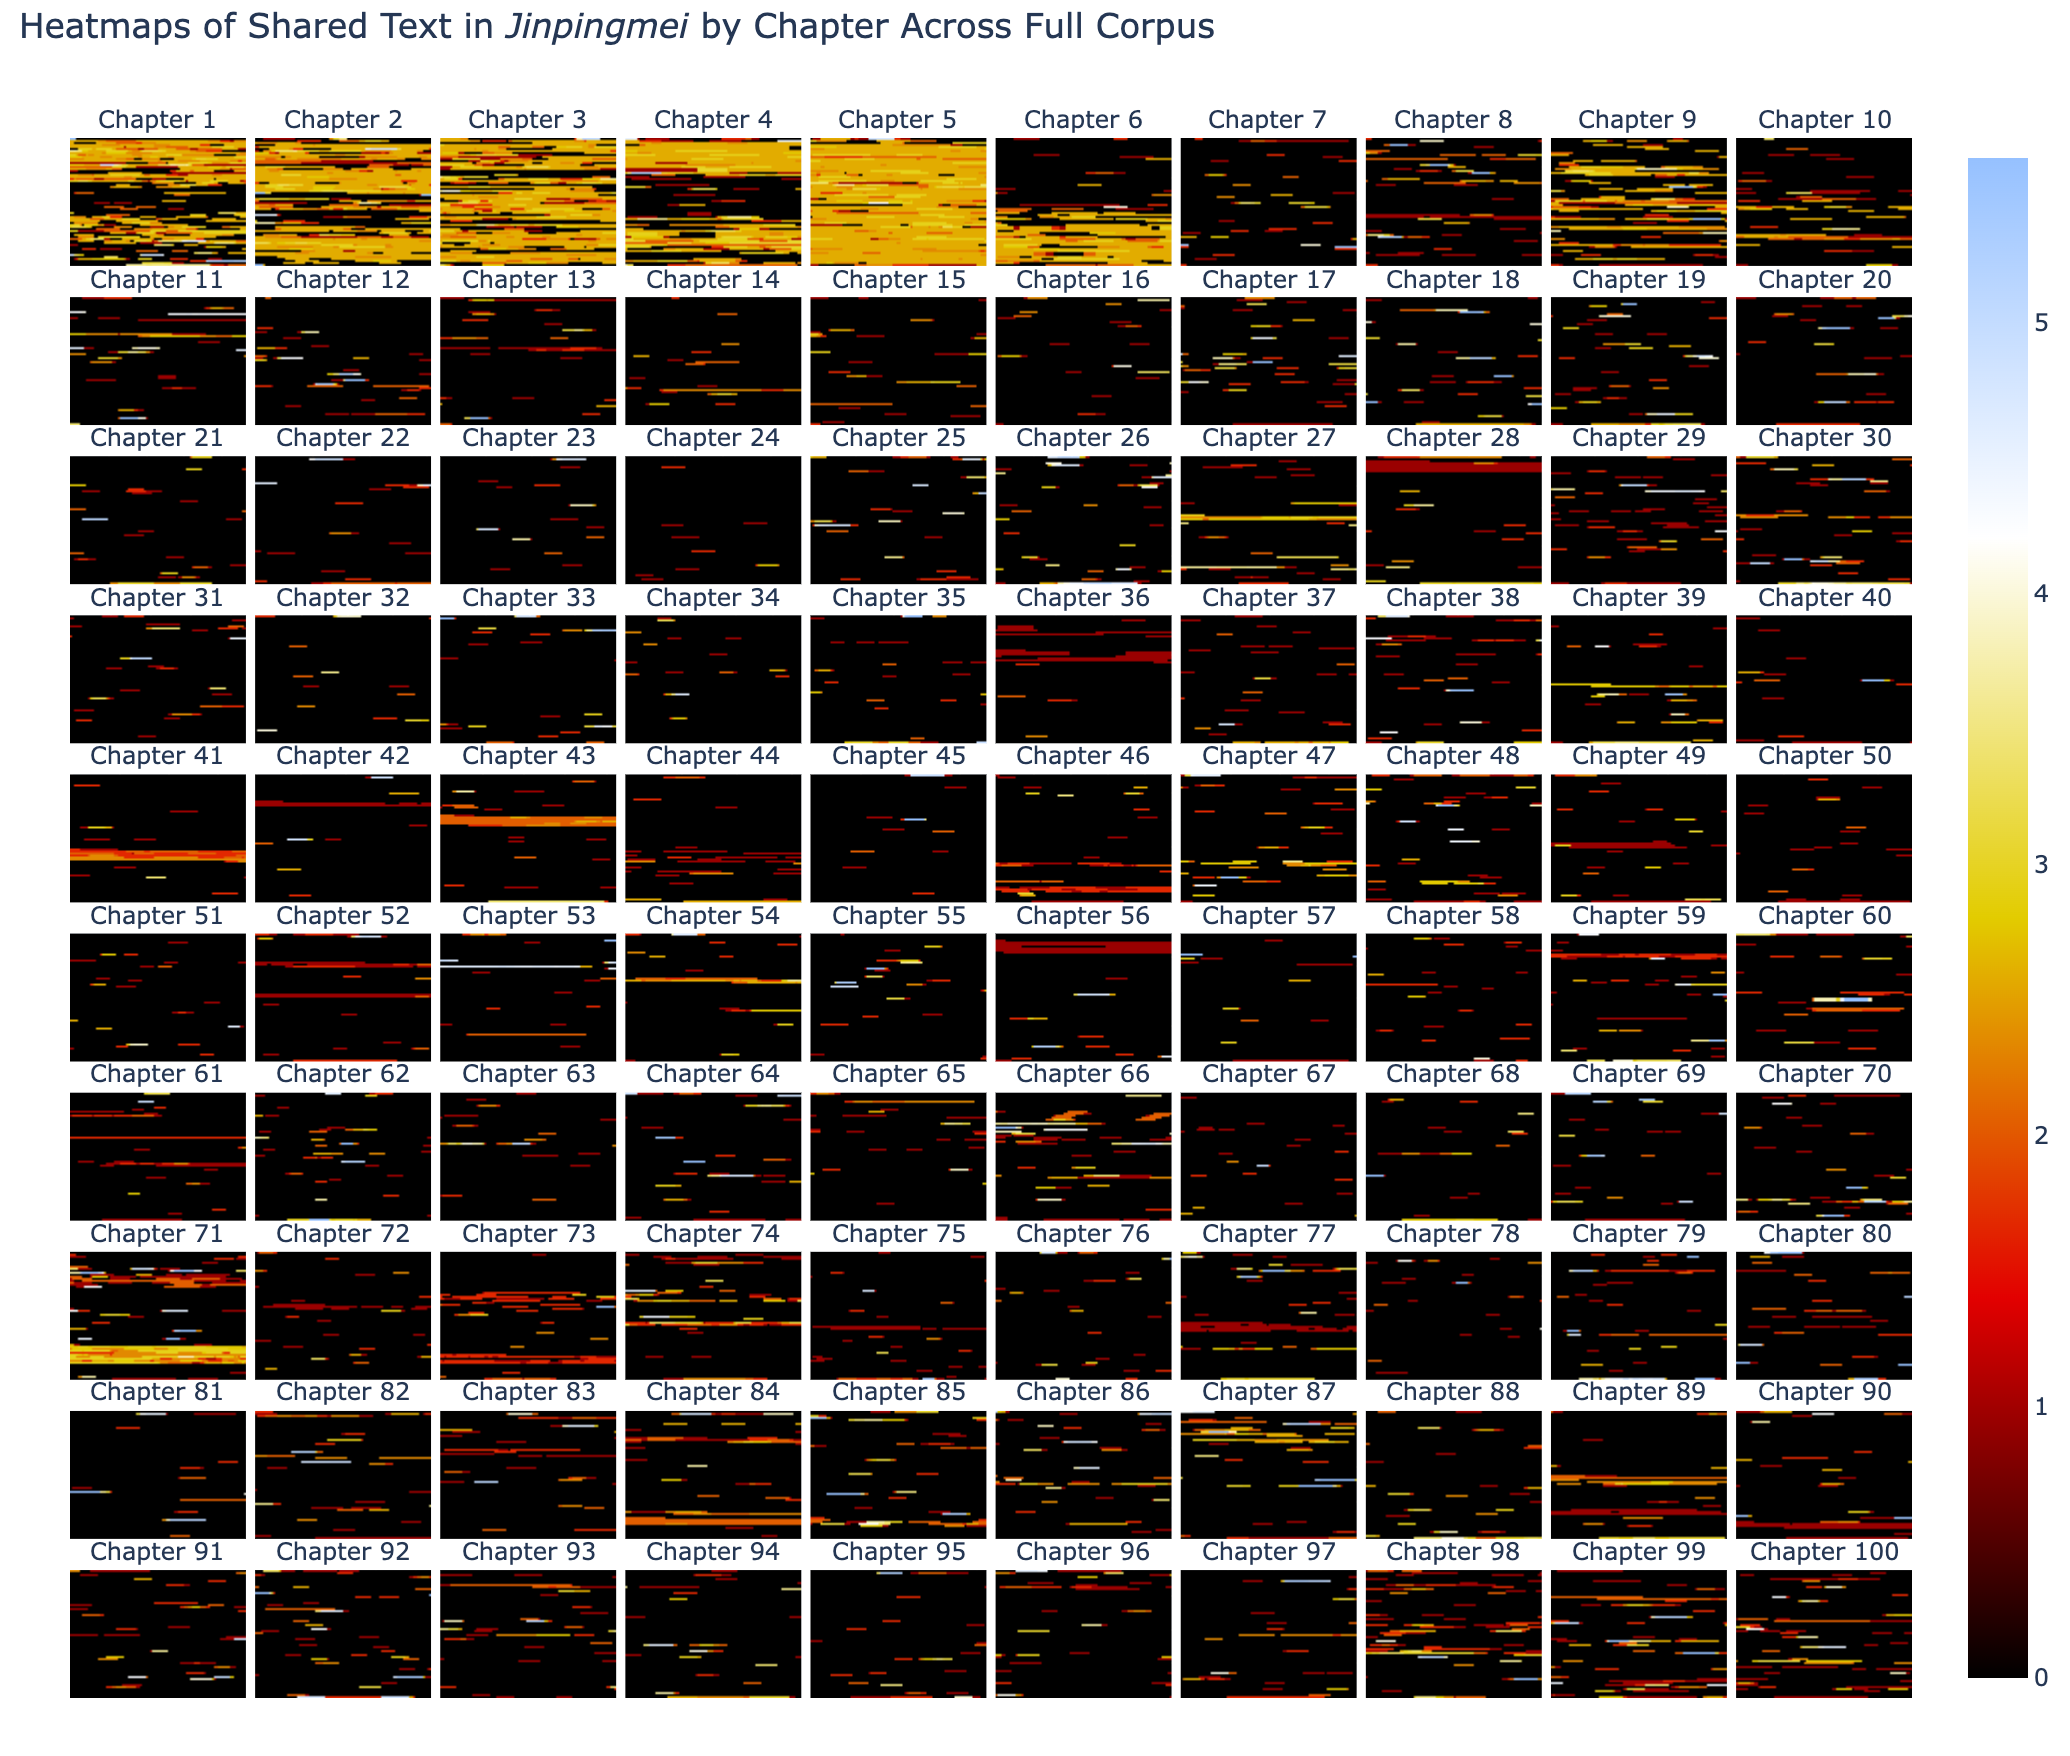

In [30]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 1: Heatmaps of Shared Text in Jinpingmei by Chapter Across Full Corpus.",
                "Shows total number of other texts a given substring appears in. For visual clarity limited to 100 and then the log of the value + 1 is taken."
            ]
            
        }
    }
}

display(Image("./media/fig_1.png", width=1000), metadata=metadata)

# code to generate figures 1 to 3 can be found in the script folder

Clearly the vast majority of intertextuality within the novel appears in the first six chapters of _Jinpingmei_, but intertextuality is spread across the entire piece. In order to focus on works that influence the novel’s contents, however, it is necessary to separate out these materials according to date. Figure 2 shows only materials that can be sourced to works that predate Jinpingmei, which gives a clearer sense of where earlier material is distributed.

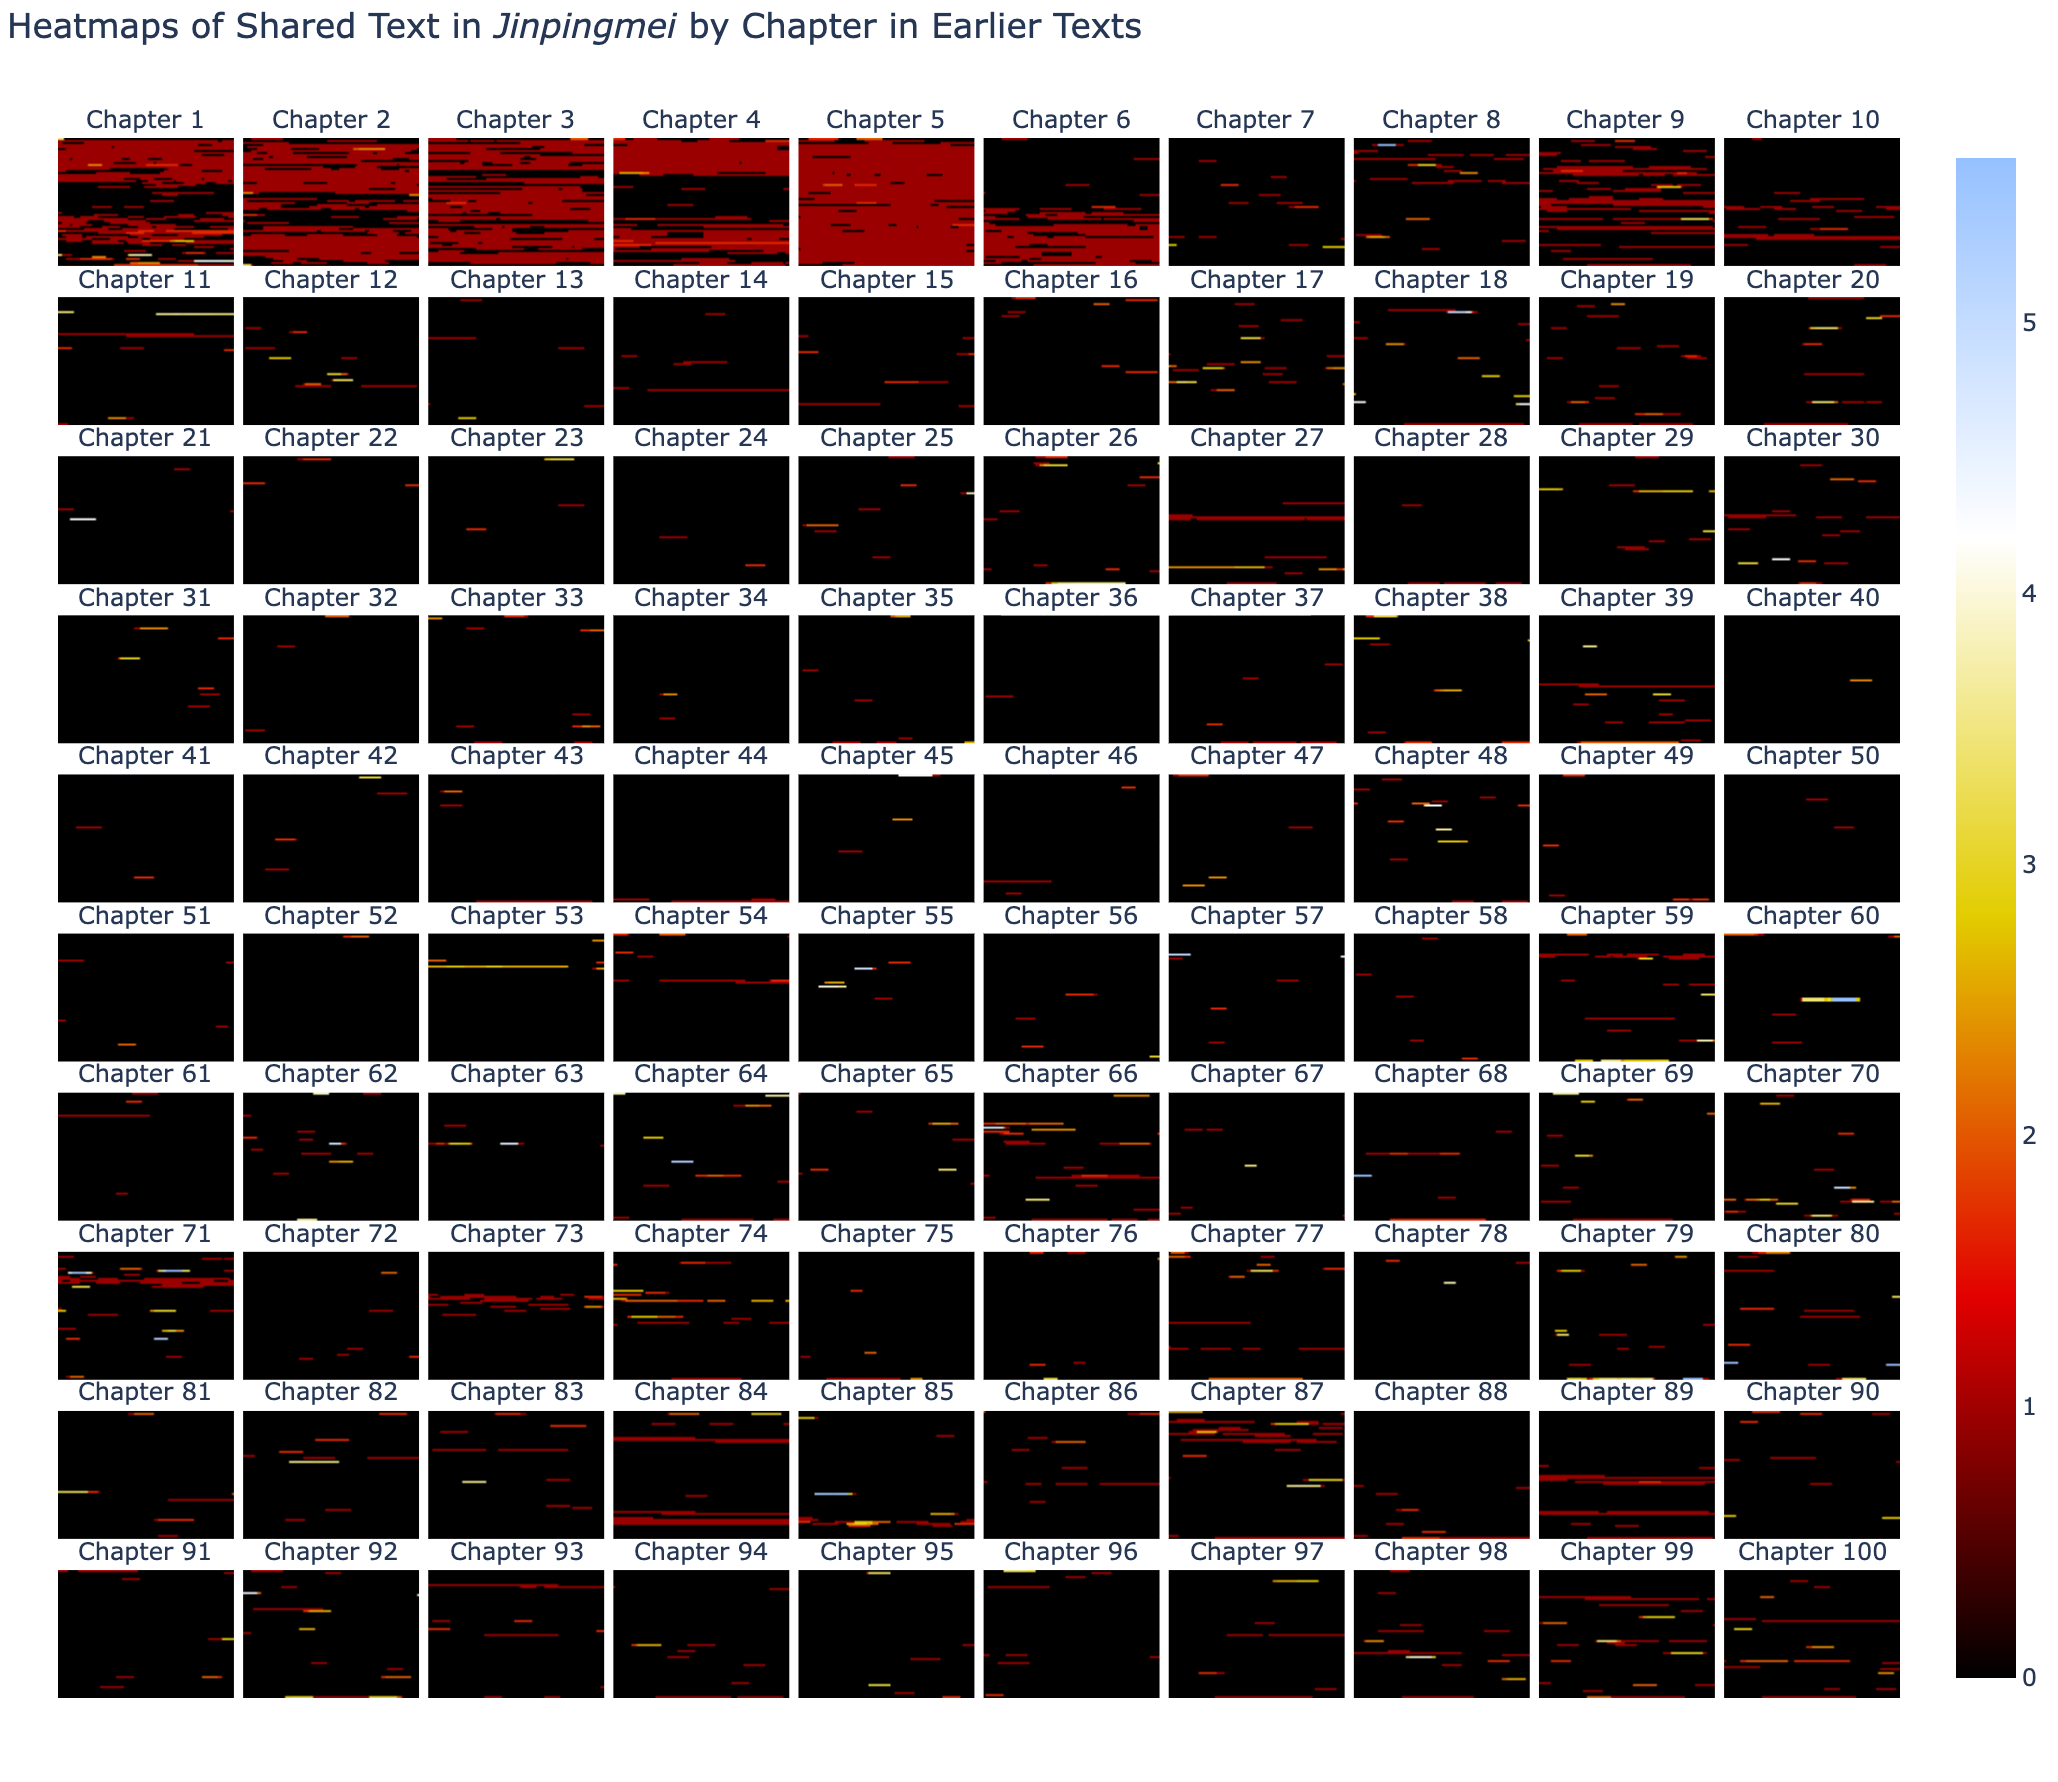

In [31]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 2: Heatmaps of Shared Text in Jinpingmei by Chapter in Earlier Texts"
            ]
            
        }
    }
}

display(Image("./media/fig_2.png", width=1000), metadata=metadata)

The earliest part of the novel is still the densest site of intertextuality, but there are sections throughout that show significant overlap with earlier material. Chapter 9 in particular is extensively connected with earlier materials. The materials represented in Figure 2 are unequivocally references made within _Jinpingmei_ to earlier works. 

There are many sections of text whose origins cannot be accounted for so simply. The numerous sections within the novel that come from roughly contemporary works, and which are difficult to automatically establish as possible source materials, are shown in Figure 3.

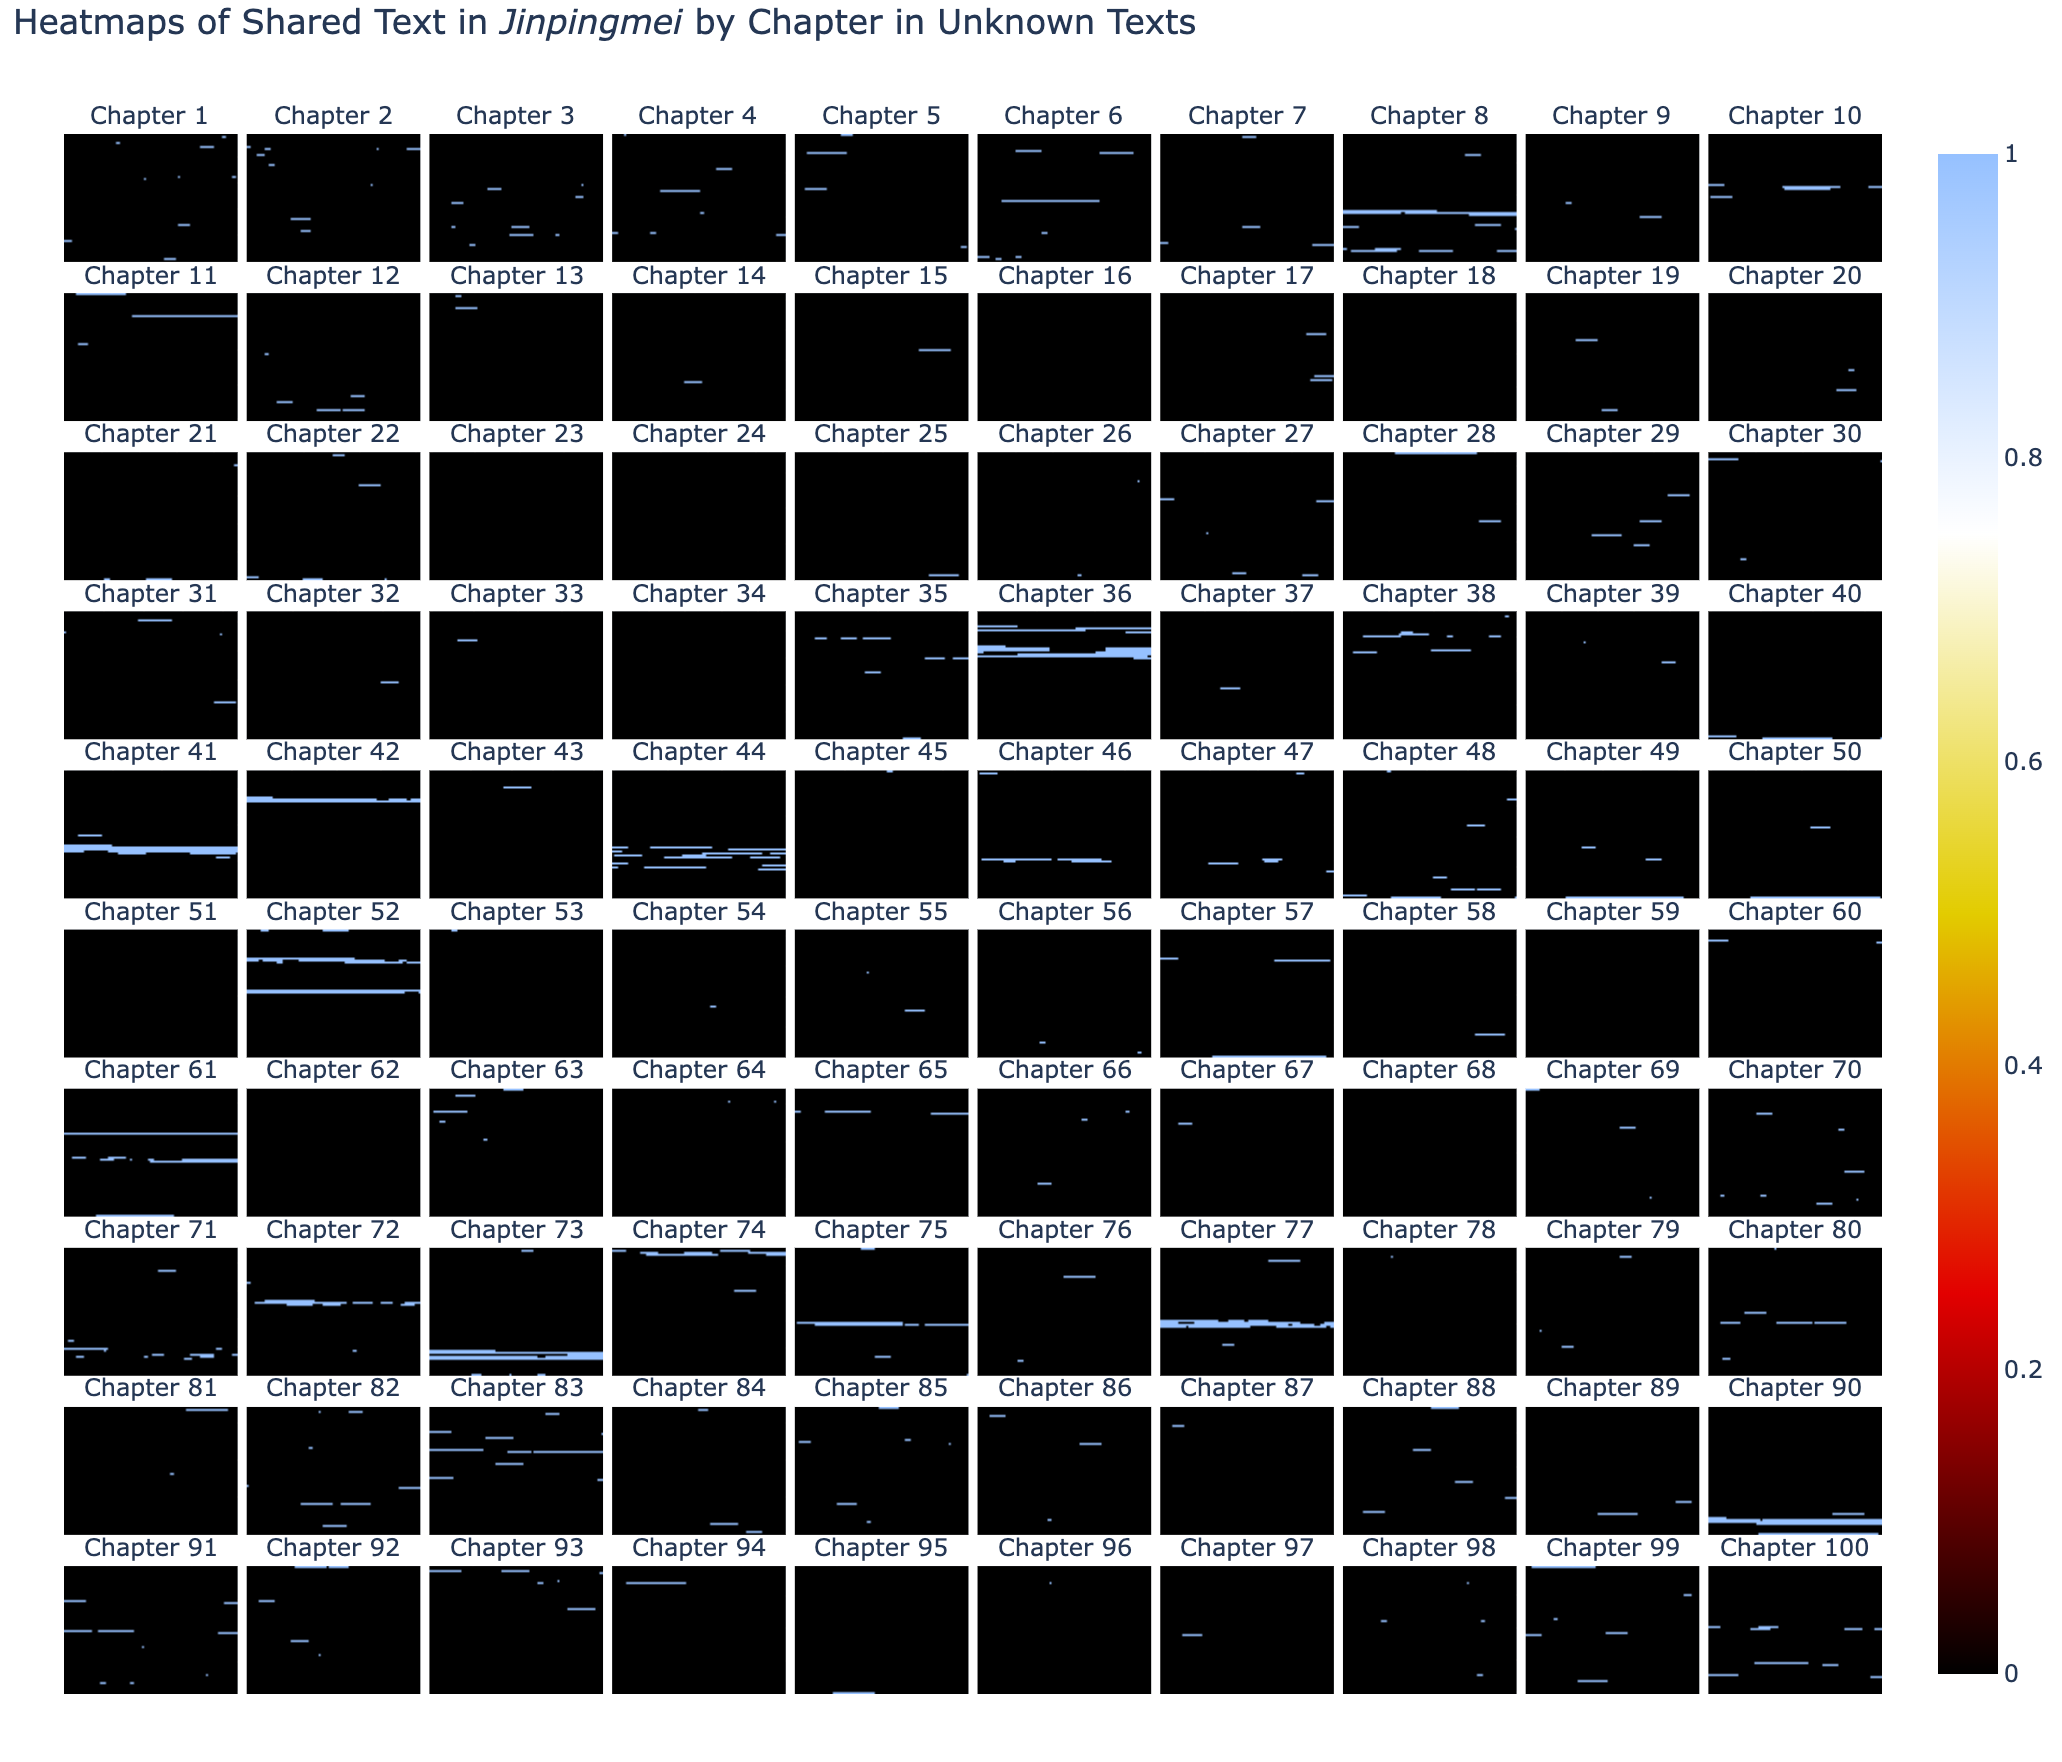

In [32]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 3: Heatmaps of Shared Text in Jinpingmei by Chapter in Unknown Texts"
            ]
            
        }
    }
}

display(Image("./media/fig_3.png", width=1000), metadata=metadata)

These unknown materials are found much more sporadically throughout the novel and computational analysis represents fascinating possibilities for understanding their likely origins.

## Deriving the origin of source material

The first step I take in identifying the likely origin of source material in _Jinpingmei_ is to filter the intertextual results into several categories. As a preliminary step, I remove the “structural” matches. These are matches like “to see what happens next read the next chapter” that derive from the generic nature of the work rather than its unique style. While these do constitute reuse, these matches do not tell us much beyond the fact that Jinpingmei is a novel that follows usual conventions. I can easily identify this structural material simply by looking for extreme spikes in intertexuality falling around chapter borders. 

I then filter the texts by known date of composition, removing materials that were written after Jinpingmei began circulating. Then I divide the remaining material into two further groups. First is material that predates the novel, which I use to test the machine learning models’ ability to reliably tease out source material. Finally I have the material that was roughly contemporary with the novel, which are the subject of investigation.

## Textual Representation

In order to create text classifiers, I need to transform natural language textual material into a numerical representation so I can process it through a computer program. There are many ways to do this, and there have been extremely rapid developments in natural language processing in recent years that allow for some very sophisticated representations.[^1] However, my philosophical approach to developing algorithms is to use the simplest methods possible that provide reliable results. As such I turn to “bag-of-words” representations of texts (technically bag of _n_-grams).(<cite data-cite="7306679/M38FG44C"></cite>) Each text fragment I study is represented as a vector, or list of numbers, whose individual dimensions consist of simple n-gram frequencies.[^2]  I use the _n_-grams that appear most frequently across the entire corpus to represent the works.[^3]  This transforms the textual differences among documents into spatial differences that can easily be measured and compared with a variety of algorithms. 

Once texts have been vectorized, I can use them to train text-classification algorithms to predict likely point of origin of a particular quote. There are multiple possible criticisms that rightly emerge from such an approach. Fundamentally, simply looking at _n_-gram frequencies disregards syntactic information and elides the complex nature of words in Chinese. Yet for the downstream task of developing models to identify a quote’s likely textual origin, I will show that such a basic representation performs quite well.

[^1]: Transformer based models are all the rage as of early 2023. They first emerged in 2018 and have since been used in a frenzy of new models.

[^2]: Transforming texts into a set of vectors like this is known as creating a vector-space model.

[^3]: In practice I use the implementation of the TfidfVectorizor found in the sci-kit learn Python library (<cite data-cite="7306679/I2V6GAHU"></cite>). This takes care of the vectorization for me while also normalizing the vectors in a way that facilitates the process of training machine learning models.

## Building the text classifiers

The approach I take to predicting the likely source of a quote (which I will refer to as a substring here, as a smaller section of the entire string the represents the whole document) rests on the intuition that the quote substring that represents a given instance of intertextuality is going to be more stylistically similar to the text it originally came from than the text that appropriates it. As such, I randomly extracting an equal number of substrings from each document while ensuring that I do not grab text that is shared between the two documents to train my models. Because the quotes I am comparing are generally between 10 and 250 or so characters in length, I ensure that the substrings I randomly extract fall at some random length between these two extremes.[^1]

[^1]: In the past I have simply trained models on substrings of equal length, but to ensure that length does not accidentally become a very important predictor, I train with substrings of variable length.

In [33]:
import random

def get_random_sections(text, blocked_sections=False, n_sections=500, length_range=(10,250)):
    """
    function to extract n sections of a random length from an input section of text. 
    
    Can optionally block intertextual sections
    """
    text_length = len(text)

    sections = []

    # Keep generating new chunks of text until the full number of sections is filled
    # this does oversample on shorter texts
    while len(sections) < n_sections:

        # set up the blocking algorithm for cases when the selected quote overlaps with known shared materials
        blocked = True
        
        while blocked:
           
            # randomly select the length and location of the match
            section_length = random.randint(*length_range)
            section_start = random.randint(0,text_length-section_length)
            section_end = section_start + section_length

            # if no blocking sections exist then release the match
            if not blocked_sections:
                blocked = False

            else:
                # check for overlap and block if found
                overlap = False
                for block in blocked_sections:
                    if len(range(max(block[0], section_start), min(block[-1], section_end)+1)) > 0:
                        overlap = True
                    # if overlap is found, or if the end of the current section is less than the start of the next block
                    # break the loop
                    if overlap or section_end < block[0]:
                        break
                
                # release the block if no overlap is found
                if not overlap:
                    blocked = False

        # add the section to the sections list
        sections.append(text[section_start:section_start+section_length])

    return sections

def get_alignment_data(alignment_file):
    '''
    helper function to load in alignment data returned as a nested list
    '''
    
    with open(f'data/alignments/{alignment_file}','r',encoding='utf8') as rf:
        intertext_data = rf.read().split("\n")
    return [d.split("\t") for d in intertext_data]

def get_document(filename):
    '''
    helper function to load document
    '''
    with open(f'data/corpus/{filename}.txt', 'r', encoding='utf8') as rf:
        return rf.read()

def get_text_and_labels(file_1, file_1_label, file_2, file_2_label, intertext_data, n_sections=500):
    '''
    function to extract texts and labels from two files, using alignment data to block out
    sections shared between the two works
    '''
    

    doc_1 = get_document(file_1)
    doc_2 = get_document(file_2)


    # get blocked sections
    doc_1_blocked = sorted([[int(d[4]), int(d[4]) + len(d[6].replace(" ", ""))] for d in intertext_data])
    doc_2_blocked = sorted([[int(d[5]), int(d[5]) + len(d[7].replace(" ", ""))] for d in intertext_data])

    # get random sections for building model
    doc_1_sections = get_random_sections(doc_1, doc_1_blocked, n_sections)
    doc_2_sections = get_random_sections(doc_2, doc_2_blocked, n_sections)

    # create labels for texts
    doc_1_labels = [file_1_label for _ in doc_1_sections]
    doc_2_labels = [file_2_label for _ in doc_2_sections]

    # combine the information for testing
    texts = doc_1_sections + doc_2_sections
    labels = doc_1_labels + doc_2_labels
    
    return texts, labels

I then transform these substrings into vectors by calculating their vectorized representation based on _n_-gram frequency.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_texts(texts, max_features=500):
    '''
    function that sets up and fits a vectorizer then transforms the input corpus
    '''
    
    vectorizer = TfidfVectorizer(analyzer="char", max_features=max_features, use_idf=False, ngram_range=(1,1))
    
    frequency_vectors = vectorizer.fit_transform(texts)
    
    # return both vectorizer and vectors because these will both be needed later
    return vectorizer, frequency_vectors




I use the resulting vectors to train and test a text classifier according to standard machine learning protocols.[^1]  Once I am confident that the model performs well at determining the origin of the randomly selected substrings, and ensure that the model is not overfit, I apply the model to actual intertextual material to determine the most likely source text.

There are many types of models useful for building text-classifiers. Support vector machines (SVM) are quite popular for text classification tasks, so I train SVM classifiers with stochastic gradient descent in my experiments here.[^2]  I could spend significant time trying to identify the absolute best algorithm to use for this, but SVMs prove quite effective and are very efficient to train and use. Pushing accuracy to the limits, while a very valid pursuit, is outside the scope of this particular article.

[^1]: I follow the procedure as outlined on the scikit learn website (<cite data-cite="7306679/SWBKE8AB"></cite>).

[^2]: As implemented in the sci-kit learn SGDClassifier class (<cite data-cite="7306679/5RMNF759"></cite>).

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

def train_and_test_model(frequency_vectors, labels, test_size=0.25):
    '''
    function that takes vectors and labels as input data, runs cross validation, trains a final model
    and returns the classifier
    '''
    
    # split data into training and testing sections following sklearn conventions
    X_train, X_test, y_train, y_test = train_test_split(frequency_vectors, labels, test_size=0.25)

    # set up classifier
    clf = SGDClassifier(loss="hinge",max_iter=50000)

    # perform 10 fold cross validation on the training set and print results
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    print("Cross Validation scores:")
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

    # retrain classifier on full training data
    clf.fit(X_train, y_train)

    # predict on test data
    y_pred = clf.predict(X_test)

    # print confusion matrix and accuracy scores
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    
    return clf

## A proof of concept

In order to assess the potential of this process, I start with a very unambiguous case of intertextuality that is clearer than most cases found within _Jinpingmei_. Two works from 1628, the _Yujing xintan_ 玉鏡新譚 and the _Jingshi yinyangmeng_ 警示陰陽夢 offer a good starting point. These two pieces both discuss Wei Zhongxian 魏忠賢 (1568--1627), the infamous eunuch who acquired significant political power during the Tianqi Emperor’s reign (1620-1627). The _Yujing xintan_ is an unofficial history and the earliest extant work to discuss Wei Zhongxian after his death. The _Jingshi yinyangmeng_ appeared a few months after the _Yujing xintan_ and is essentially a novelization of the earlier history. Given the very clear textual connection between these two works and their relatively distinct styles, the case offers a nice proof of concept. This distinct style is quite evident when I use principal component analysis to visualize the variance among randomly selected substrings drawn from these two works, as shown in Figure 4.[^1]

[^1]: For detailed engagement with the usefulness of principal component analysis for understanding Chinese stylistics, see (<cite data-cite="7306679/KZER2VQN"></cite>).

In [36]:
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go

def generate_PCA_viz(frequency_vectors, vectorizer, title):
    '''
    function that takes frequency vectors and a vectorizer object and generates a principal component
    analysis visualization.
    '''
    
    pca = PCA(n_components=2)
    my_pca = pca.fit_transform(frequency_vectors.toarray())

    
    pca_df = pd.DataFrame({"pc1":my_pca[:,0], "pc2":my_pca[:,1],"labels":labels})
    fig = px.scatter(pca_df, x="pc1", y="pc2", color="labels", title=title,
                     labels={"pc1":f"PC1 ({pca.explained_variance_[0]*100:.2f}% of variance)",
                             "pc2":f"PC2 ({pca.explained_variance_[1]*100:.2f}% of variance)",
                             "labels":"Text of Origin"})
    vocab = vectorizer.get_feature_names_out()
    loadings = pca.components_
    loadings_df = pd.DataFrame({"vocab":list(vocab), "pc1":loadings[0], "pc2":loadings[1]})

    fig.add_trace(go.Scatter(x=loadings_df["pc1"], y=loadings_df["pc2"], text=loadings_df["vocab"], mode="text", visible="legendonly", name="Loadings"))
    fig.show()
    
    
# The following code can be used to generate an interactive version of figure 4.
def run_fig_4_viz_code():
    # Figure 4 generation
    file_1 = "9785"
    label_1 = "Jingshi"

    file_2 = "18077"
    label_2 = "Yujing"

    # specify the known source for model evaluation
    known_source = "Yujing"

    # get intertext data
    intertext_data = get_alignment_data("yujingjingshi.txt")

    # Load and then randomly divide the two texts
    sections, labels = get_text_and_labels(file_1, label_1, file_2, label_2, intertext_data) 

    # Vectorize the texts
    vectorizer, frequency_vectors = vectorize_texts(sections)

    # Generate Figure 4
    generate_PCA_viz(frequency_vectors, vectorizer, "PCA showing style of Jingshi yinyangmeng vs. Yujing xintan")


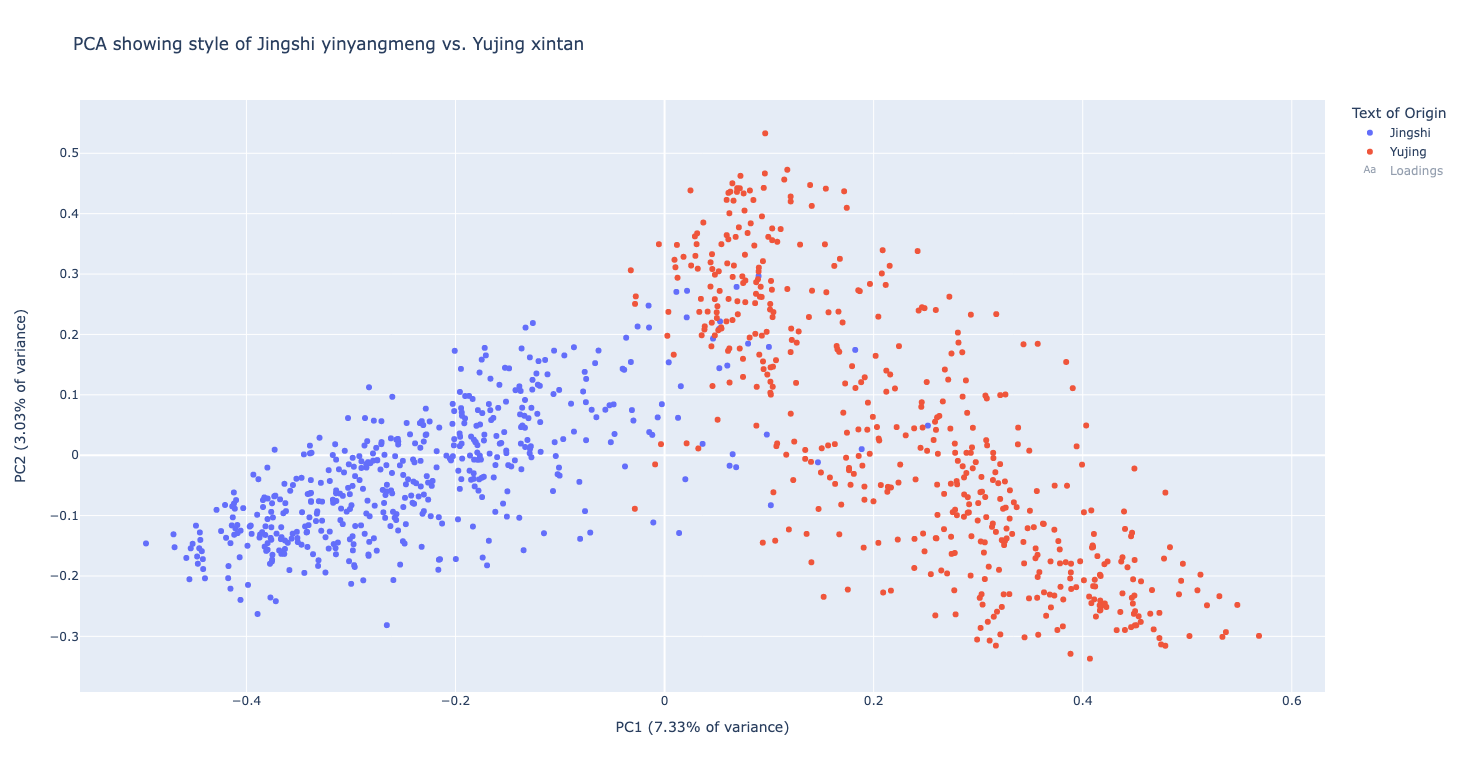

In [37]:
from IPython.display import Image, display
import IPython
# Load figure from html stored in the data file
metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 4: Principal Component Analysis showing style of _Jingshi yinyangmeng_ vs. _Yujing xintan_"
            ]
            
        }
    }
}
display(Image("./media/fig_4.png", width=1000), metadata=metadata)

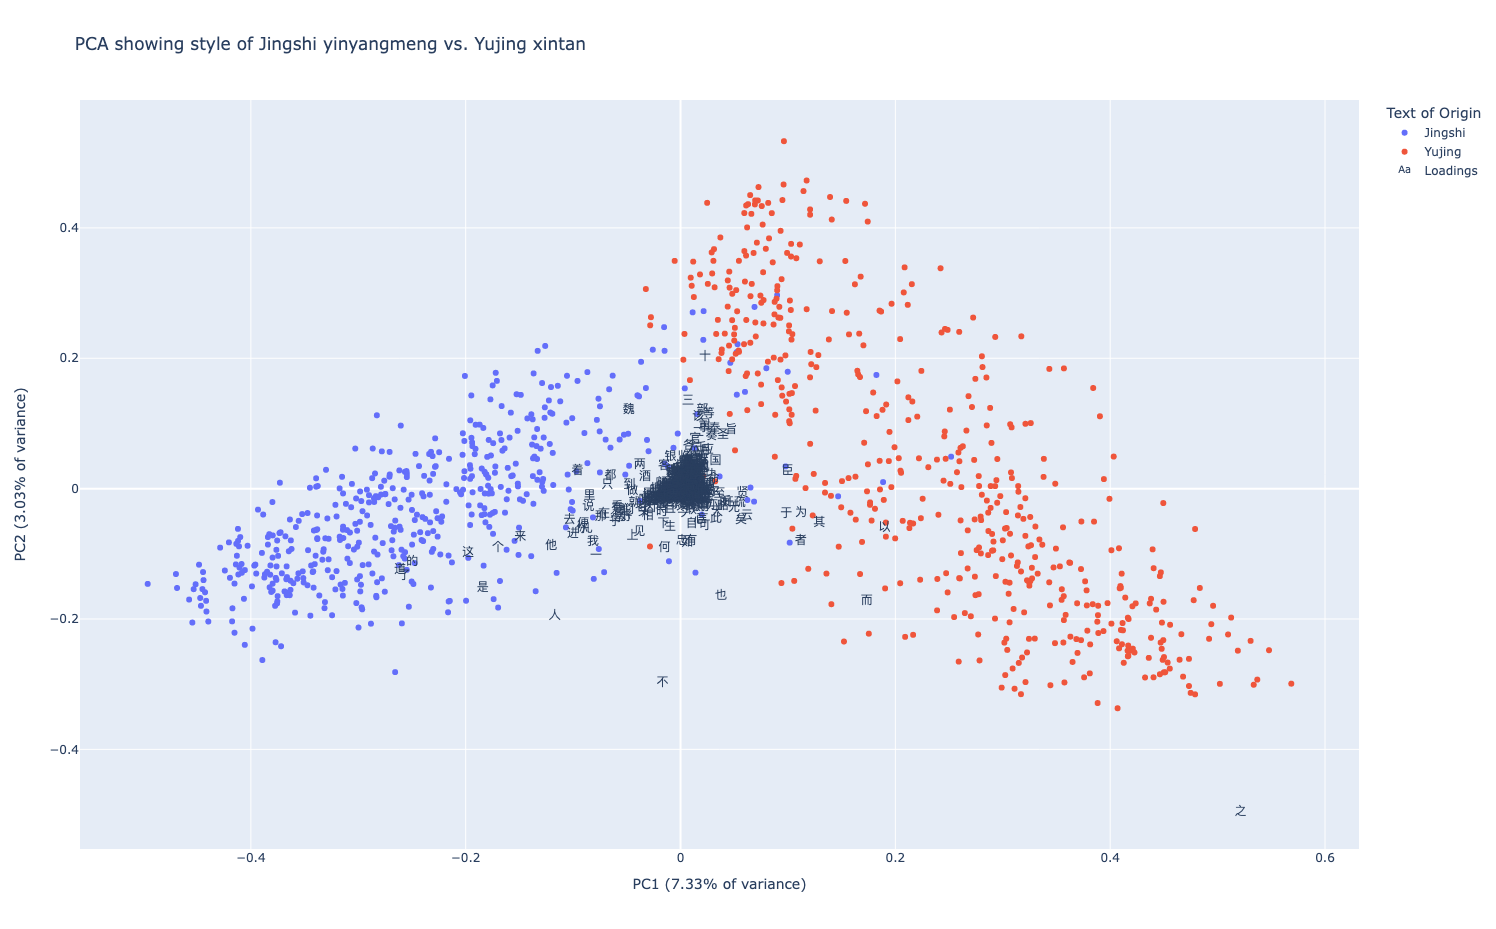

In [38]:
from IPython.display import Image, display
import IPython
# Load figure from html stored in the data file
metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 4a: Principal Component Analysis showing style of Jingshi yinyangmeng vs. Yujing xintan with Loadings"
            ]
            
        }
    }
}
display(Image("./media/fig_4a.png", width=1000), metadata=metadata)

There is some overlap in the central part of this figure when sections from each text appear in similar spaces, but it is mostly distinct. The component loadings shown in figure 4a also offer an opportunity to study why texts get pulled in the direction they do.[^1]: These first two components only show around ten percent of the total variance within the dataset. As such it obscures much of the actual differences between the works. Even so, there is a clear distinction between the two texts, and I use the very same vectors I am visualizing to train a classifier. I begin by dividing the randomly selected substrings into two groups. I use 75 percent of them to train the model and hold out 25 percent to validate it. Then I use ten-fold cross-validation on the training vectors to measure the accuracy of my classifiers. The classifiers are 98 percent accurate with a standard deviation of 2 percent. I then train a classifier on all 75 percent of the training vectors and test it against the 25 percent of held-out vectors. This results in a model that is 98 percent accurate, as shown in the confusion matrix below:

[^1]: The further a character is from the center of the figure (0,0) the more it "pulls" documents in that direction when it occurs frequently in the document.

In [39]:
# you can test by running train and test the model
def run_model(frequency_vectors, labels):
    clf = train_and_test_model(frequency_vectors, labels, test_size=0.25)

 Confusion Matrix|Actual _Yujing_|Actual _Jingshi_
---|---|---
Predicted _Yujing_|122|4
Predicted _Jingshi_|2|122

I then apply this model to the sections of text shared between the _Yujing xintan_ and _Jingshi yinyangmeng_. I know that all the shared text originates in the _Yujing xintan_. Figure 5 shows that the model quite accurately traces the origins of the shared quotes to _Yujing xintan_, and the longer the quote is the better the model works. 

In [40]:
# Constrain the shortest quotes to ever longer sections and test model's accuracy.

def run_multiple_models(file_1, label_1, file_2, label_2, intertext_data, known_source, start_limit=8, end_limit=50):
    '''
    Function to test multiple models against varying string lengths
    '''
    
    
    
    #empty lists to gather info
    limits = []
    accuracy = []
    samples = []
    origins = []
    
    for limit in range(start_limit, end_limit):
        # extract just the shared info where the quote at least meets the length threshold
        shared_info = [[d[6].replace(" ", ""), label_1] for d in intertext_data if file_1 in [d[0], d[1]]] + [[d[7].replace(" ", ""), label_2] for d in intertext_data if file_2 in [d[0], d[1]]]

        shared_info = [s for s in shared_info if len(s[0]) >= limit]




        for origin in [label_1, label_2, "Overall Performance"]:
            # get shared text by origin
            if origin == "Overall Performance":
                shared_text = [d[0] for d in shared_info]
            else:
                shared_text = [d[0] for d in shared_info if d[1] == origin]

            # get shared vectors
            shared_frequencies = vectorizer.transform(shared_text)

            # get predictions
            shared_pred = clf.predict(shared_frequencies)

            # create results dictionary
            results = {p:list(shared_pred).count(p) for p in set(shared_pred)}
            if "Jinpingmei" not in results:
                results["Jinpingmei"] = 0
            if known_source:
                correct_res = results[known_source]
            else:
                # if no known source, set 1 to JPM and 0 to other.
                correct_res = results["Jinpingmei"]
                
            # append results to lists
            limits.append(limit)
            accuracy.append(correct_res/len(shared_pred))
            samples.append(len(shared_pred))    
            origins.append(origin)         

    # create a dataframe for model accuracy
    df = pd.DataFrame({"length":limits, "accuracy":accuracy, "sample_length":samples, "origin":origins})

    # visualize the model's accuracy
    # if known_source set accuracy label
    if known_source:
        accuracy_label = "Accuracy of Model"
    else:
        accuracy_label = "Percent selected as Jinpingmei"
    
    fig = px.line(df, x="length", y="accuracy", color="origin", 
                  labels={
                    "length":"Minimum Length of Quote",
                    "accuracy":accuracy_label,
                    "origin":"Text Quote Appears In"
                  },
                  hover_data=["sample_length"], 
                  title="Accuracy of model based on sample length and text in which quote comes from")
    fig.update_layout(yaxis_range=[0,1])
    fig.show()
    
    
# Generate Figure 5
# This may take a moment to run
def gen_fig_5():
    run_multiple_models(file_1, label_1, file_2, label_2, intertext_data, known_source)

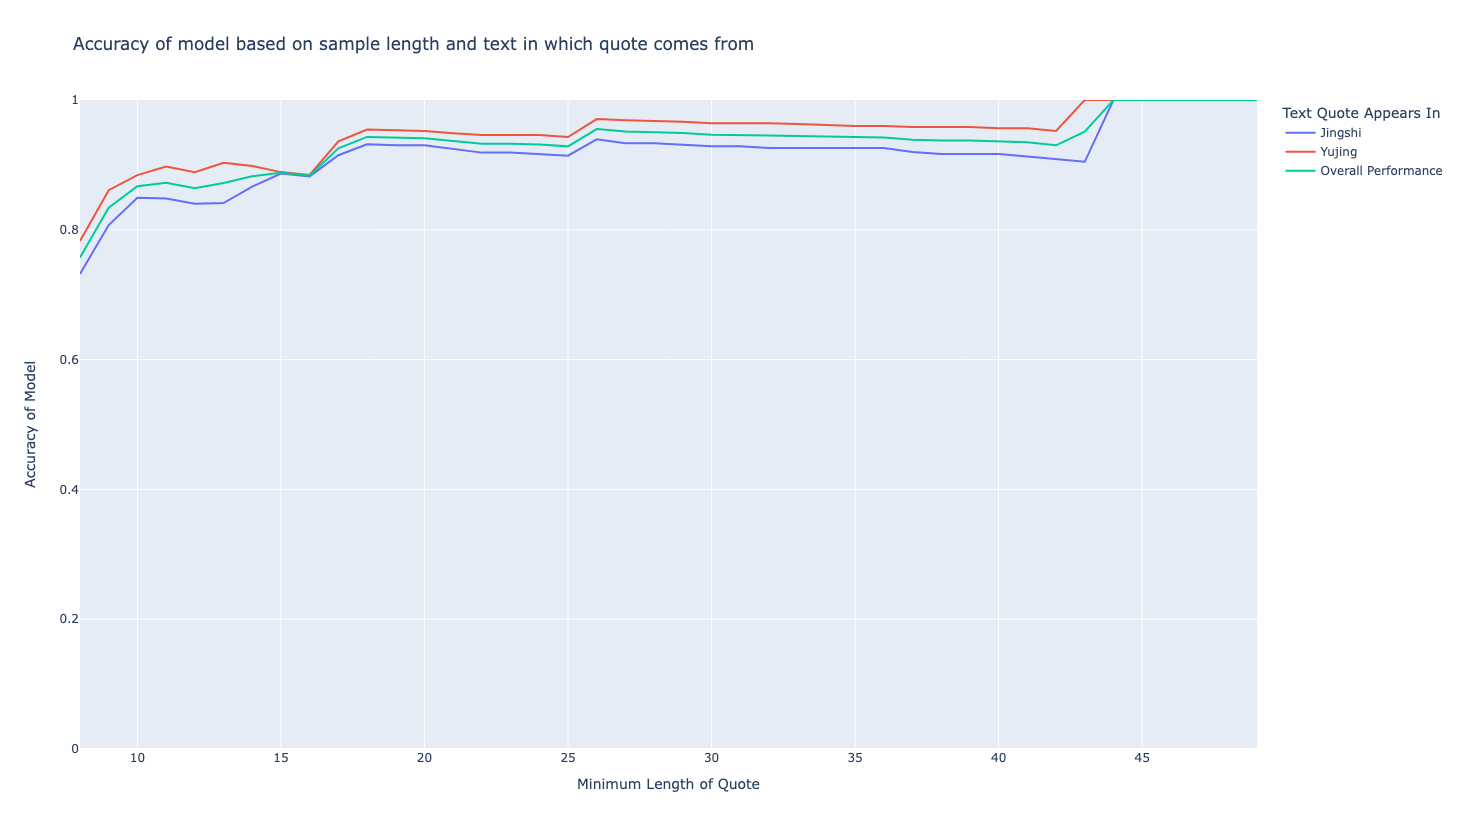

In [41]:
from IPython.display import Image, display
import IPython
# Load figure from html stored in the data file
metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 5: Plot showing accuracy of models in predicting Yujing as quote origin by length of quote"
            ]
            
        }
    }
}
display(Image("./media/fig_5.png", width=1000), metadata=metadata)
    


This improvement in accuracy as quotes get longer is unsurprising, given that the short shared phrases tend not to be what I would consider meaningful sharing. Instead things like dates generate multiple instances of detected intertextuality, like for example “the sixth day of the eleventh month of the seventh year of the Tianqi reign 天启七年十一月初六日 (December 13, 1627).” The model is not good at associating these with a specific document, nor should we expect it to be, as the phrase in question does not reflect the style of the work. Additionally, the model is better at correctly predicting the origin of a section of material when the version of the quote is as it appears in the original document. This is unsurprising, given that the intertextuality algorithm allows up to 20 percent difference between strings and these quotes are often edited to fit within the destination text. Even so, the model is still quite accurate across the board and convincingly establishes that the shared material originates from the _Yujing xintan_.

## _Jinpingmei_ vs. _Shuihu zhuan_

This proof of concept illustrates that under ideal conditions, it is possible to identify similar the origins of intertextuality based on apparent textual similarity. The most important intertextual cases within _Jinpingmei_, however, sometimes present us with less ideal circumstances. As I noted earlier in this article, it is very well established that _Shuihu zhuan_ played an enormously influential role in the development of _Jinpingmei_. As such, the procedure outlined for the Wei Zhongxian texts will likely be effective, but this is possibly complicated by the shared generic features of _Jinpingmei_ and _Shuihu zhuan_. They do not have the distinct generic features that very effectively divide the _Yujing xintan_ from the _Jingshi yinyangmeng_. As Figure 6 shows, when I visualize the stylistic difference among randomly selected document vectors from _Jinpingmei_ and _Shuihu zhuan_, there much more overlap between the two texts. This suggests that their distributions of frequent terms are more similar to each other than what is seen in the of the Wei texts.

In [42]:
def gen_fig_6():
    # Figure 6 generation
    file_1 = "25272"
    label_1 = "Jinpingmei"

    file_2 = "25124"
    label_2 = "Shuihu"

    # specify the known source for model evaluation
    known_source = "Shuihu"

    # get intertext data
    intertext_data = get_alignment_data("jpm_alignment.txt")

    # Load and then randomly divide the two texts
    # In the notebook version I do not provide the intertext data to block out shared materials because it
    # slows the calculations down signficantly. The figure I generated locally, which is the visualization
    # shown in the article does block shared material.
    sections, labels = get_text_and_labels(file_1, label_1, file_2, label_2, [], n_sections=2000) 

    # Vectorize the texts
    vectorizer, frequency_vectors = vectorize_texts(sections)

    # Generate Figure 7
    generate_PCA_viz(frequency_vectors, vectorizer, "PCA showing style of Jinpingmei vs. Shuihu zhuan")

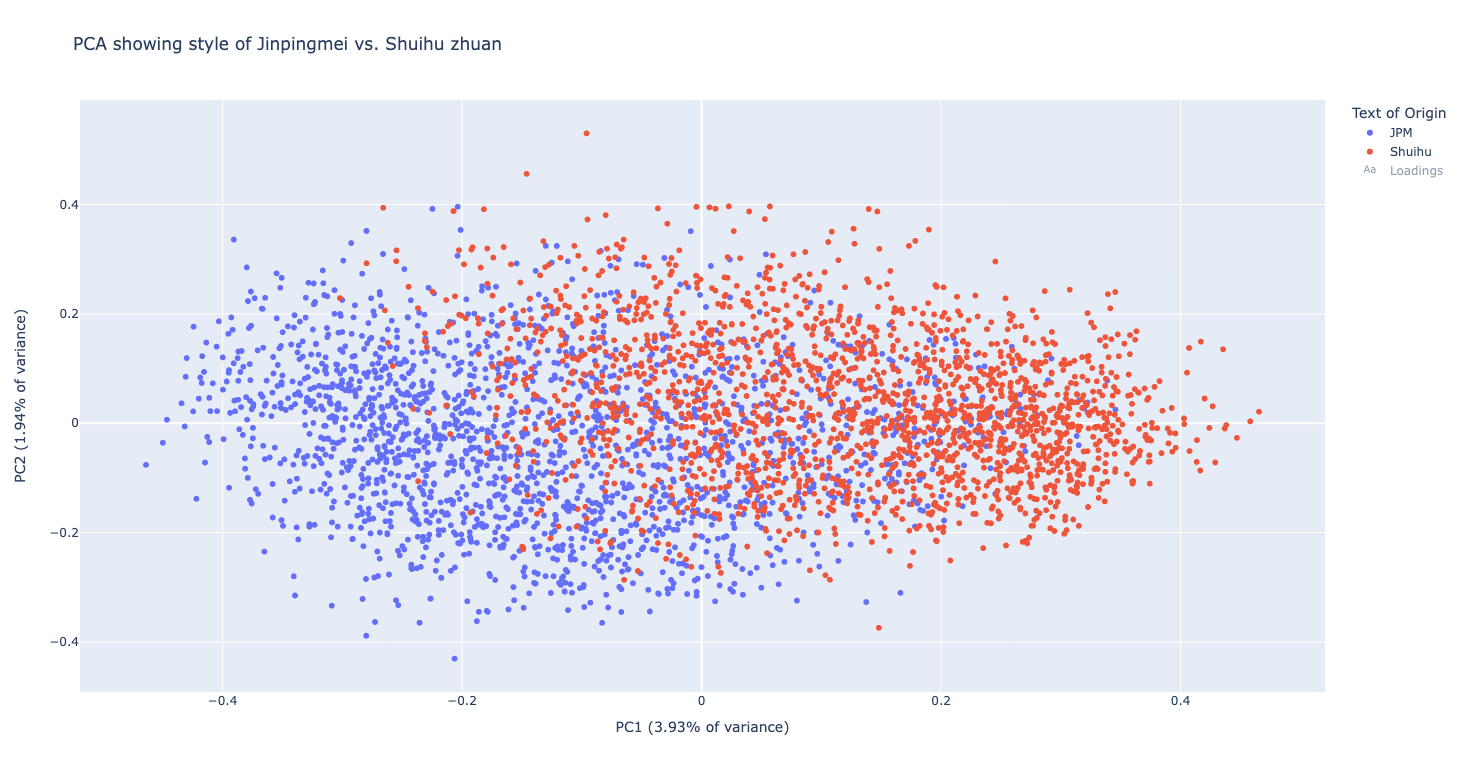

In [43]:
from IPython.display import Image, display
import IPython
# Load figure from html stored in the data file
metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 6: PCA showing style of _Jinpingmei_ vs. _Shuihu zhuan_"
            ]
            
        }
    }
}
display(Image("./media/fig_6.png", width=1000), metadata=metadata)

Still, significant variance hides in these types of visualizations, so I developed a text classifier using the same approach as above to distinguish material in _Jinpingmei_ from _Shuihu zhuan_. Somewhat surprisingly, the model’s accuracy is negligibly different from the first experiment. Using ten-fold cross validation, the model is 95 percent with a standard deviation of 1 percent. The following confusion table illustrates the 95 percent accurate results of applying the model to the validation set:

In [44]:
# train and test the model
def run_train():
    clf = train_and_test_model(frequency_vectors, labels, test_size=0.25)

 Confusion Matrix|Actual _Jinpingmei_|Actual _Shuihu zhuan_
---|---|---
Predicted _Jinpingmei_|487|27
Predicted _Shuihu zhuan_|16|466

Yet in spite of the excellent performance of the model, its accuracy is much less impressive when applied to the sections of text shared between the two novels. The classifier struggles to hit 60 percent accurate, and the edited sections of text found within _Jinpingmei_ are associated with _Shuihu zhuan_ just over 50 percent of the time. This is only marginally better than a random guess. 

In [45]:
def gen_fig_7():
    # Generate Figure 7
    # This may take a moment to run
    run_multiple_models(file_1, label_1, file_2, label_2, intertext_data, known_source)

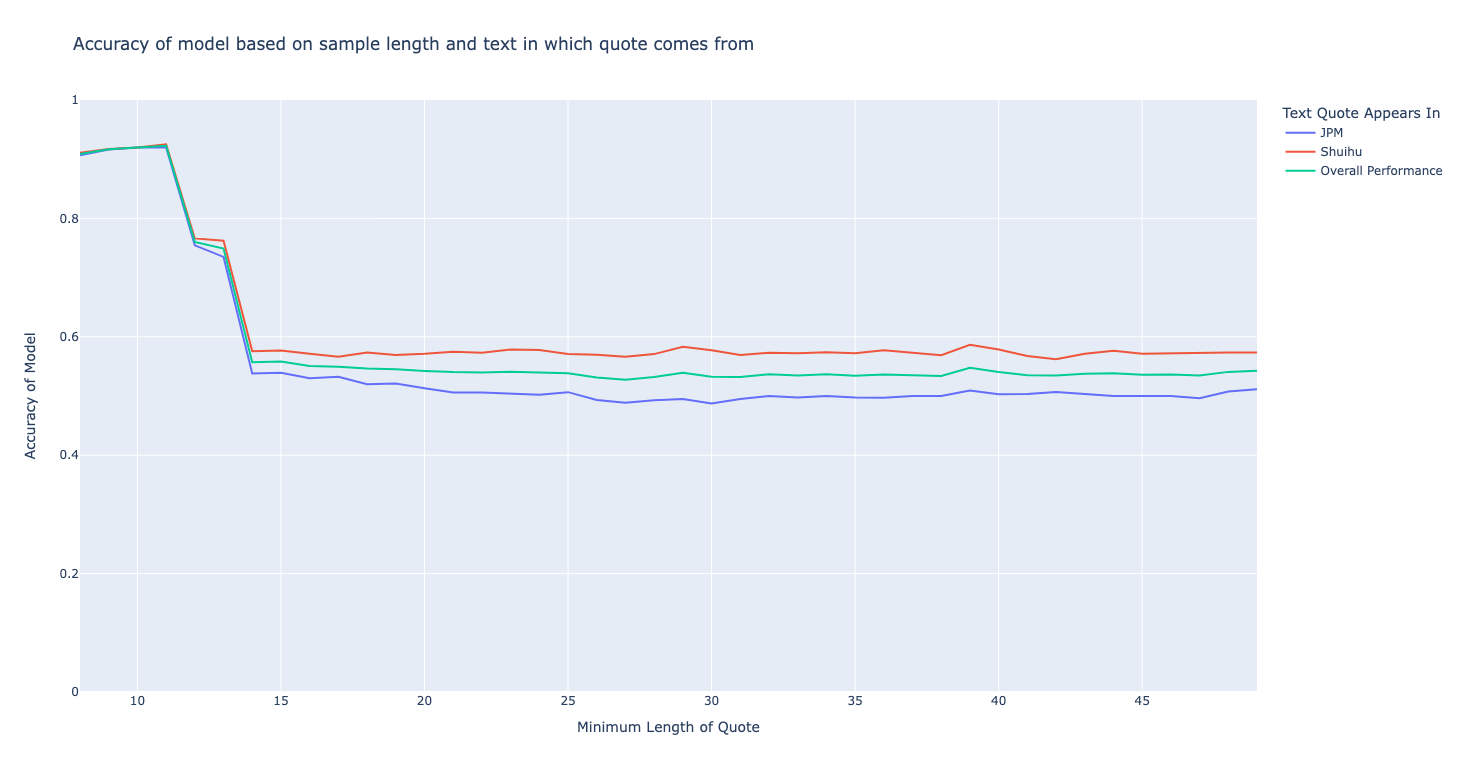

In [46]:
from IPython.display import Image, display
import IPython
# Load figure from html stored in the data file
metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 7: Accuracy of the model based on the length of quote and its text of origin. Qutoes known to come from _Shuihu zhuan_."
            ]
            
        }
    }
}
display(Image("./media/fig_7.png", width=1000), metadata=metadata)

The overall results of the model do point us to _Shuihu zhuan_ as the likely progenitor of the shared materials, but the source of inaccuracies in the model is also very instructive. The large amount of error largely stems from the complex relationship between the two texts. First, we can expect some noise simply because _Shuihu zhuan_ is not represented in the corpus by the exact edition the author likely used to compose _Jinpingmei_.  Additionally, _Jinpingmei_ is a novel centered on several important people who also appear in _Shuihu zhuan_. Most prominent is Ximen Qing 西門慶, the anti-hero of _Jinpingmei_. He dominates the narrative for the first 70 chapters of _Jinpingmei_, until he dies towards the end. Pan Jinlian 潘金蓮, the woman whose wooing occupies the first section of _Jinpingmei_ and dominates the narrative of the novel as a whole, also appears in Shuihui zhuan. _Jinpingmei_ begins as an edited version of _Shuihu zhuan_. In Shuihu zhuan, Wu Song kills Ximen Qing and Pan Jinlian at the offset of their relationship. As such, Ximen and Pan only appear in a few chapters of Shuihu zhuan. But _Jinpingmei’s_ author copies these chapters nearly verbatim into _Jinpingmei_ but alters the story such that Ximen Qing and Pan Jinlian initially escape Wu’s wrath. They go on to appear in dozens of chapters. A randomly selected piece of text from _Shuihu zhuan_ is not particularly likely to mention either figure. Random text from _Jinpingmei_ is quite likely to mention one or both of them. Nearly all of their mentions in _Shuihu zhuan_ are concentrated in intertextual moments, so the model tends to associate them with _Jinpingmei_. This phenomenon appears in the loadings Figure 7, where the Chinese characters in Ximen Qing and Pan Jinlian’s names play an important role in distinguishing the two novels. As such, the model is biased to think that any text that mentions them comes from _Jinpingmei_. If the n-grams within Ximen Qing and Pan Jinlian’s names are used as stop words and removed from the corpus prior to training, then the accuracy of the model moves well into the 70s.  Rather than being detrimental to the efficacy of this approach, it reveals the necessity of understanding exactly what causes these models to decide things in the way that they do.

## Jinpingmei vs. Li Kaixian’s Cinüe

Another intriguing example of intertextuality exists between _Jinpingmei_ and Li Kaixian’s work _Cinüe_ 詞謔, a rather obscure piece of dramatic criticism. These two works share a smattering of text throughout _Jinpingmei_, but one scene of particular importance shared between the two occurs in chapter 71 of _Jinpingmei_, in which Ximen Qing and He Xin the Eunuch Director listen to a rather extended song suite.[^1] Establishing the directionality of quotation is particularly interesting if it turns out the Cinüe is quoting from _Jinpingmei_, then this might serve as evidence that Li Kaixian is a prime candidate for the likely identity of the author of _Jingpingmei_. Some scholars already suspect Li may be the author, but he passed away in 1568, well before there is evidence of _Jinpingmei_ circulating. Beyond its implications for authorship, this would also potentially push the earliest date of composition of the novel back in time substantially.

The style of _Jinpingmei_ and _Cinüe_ is quite distinct, as shown in figure 8. 

[^1]: For an English translation of the suite see (<cite data-cite="7306679/GGDJFCUZ"></cite>, 309).

In [47]:
def gen_fig_8():
    # Figure 8 generation
    file_1 = "25272"
    label_1 = "Jinpingmei"

    file_2 = "21285"
    label_2 = "Cinue"

    # get intertext data
    intertext_data = get_alignment_data("jpm_alignment.txt")

    # Load and then randomly divide the two texts
    # In the notebook version I do not provide the intertext data to block out shared materials because it
    # slows the calculations down signficantly.
    sections, labels = get_text_and_labels(file_1, label_1, file_2, label_2, [], n_sections=500) 

    # Vectorize the texts
    vectorizer, frequency_vectors = vectorize_texts(sections)

    # Generate Figure 7
    generate_PCA_viz(frequency_vectors, vectorizer, "PCA showing style of Jinpingmei vs. Cinue")

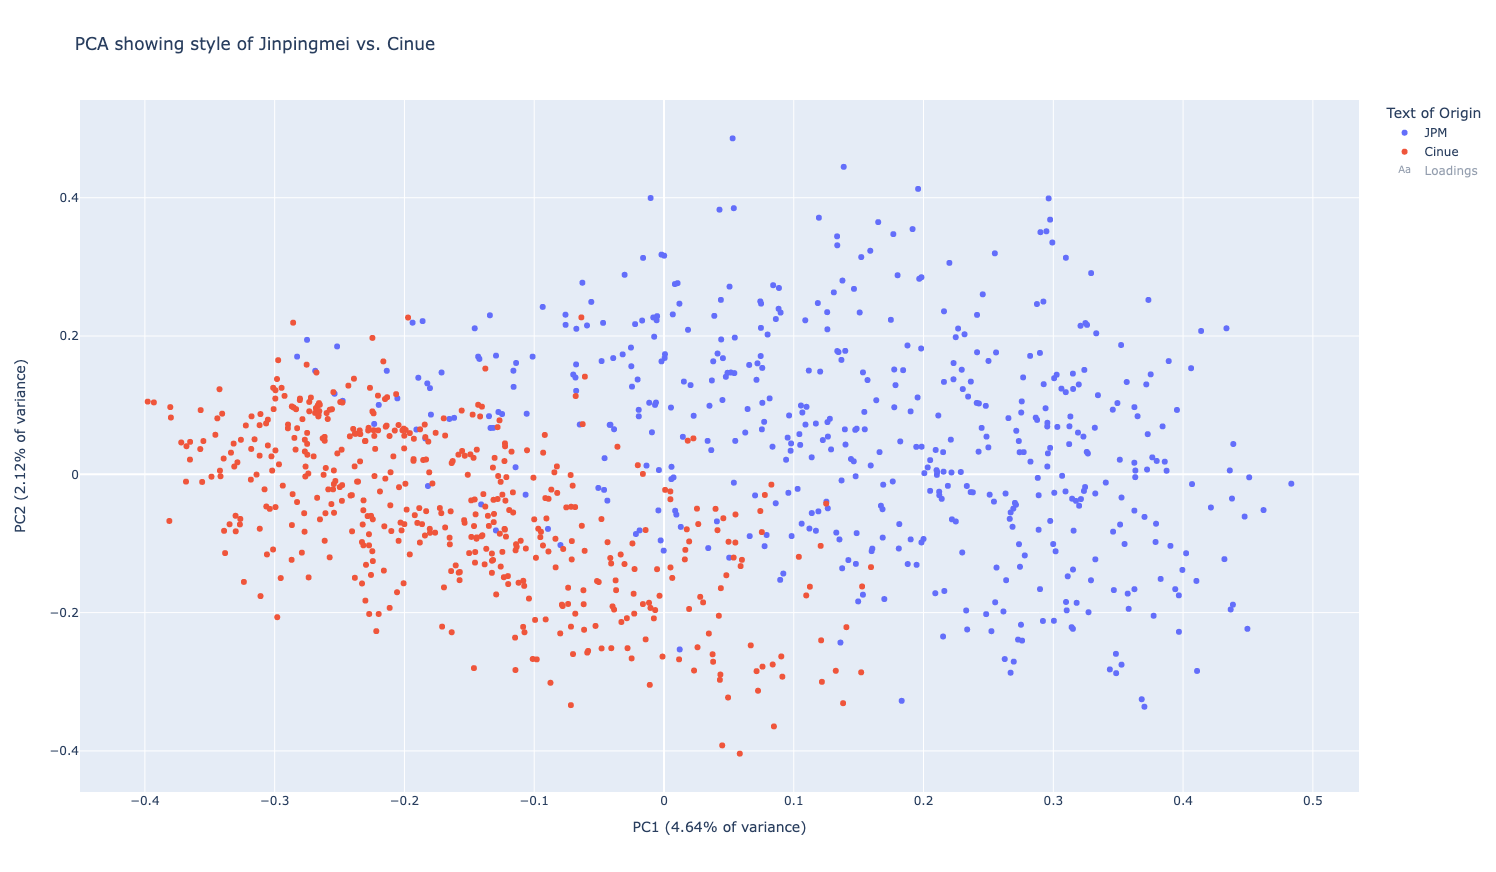

In [48]:
from IPython.display import Image, display
import IPython
# Load figure from html stored in the data file
metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 8: PCA showing style of _Jinpingmei_ vs. _Cinüe_"
            ]
            
        }
    }
}
display(Image("./media/fig_8.png", width=1000), metadata=metadata)

There is some amount of stylistic overlap, but not nearly so much as seen between _Jinpingmei_ and _Shuihu zhuan_. In this case the algorithm produces a model that is 94 percent accuarate with a standard deviation of 3 percent. The fully trained model is 95 percent accurate and results in the following confusion matrix.

In [49]:
def run_training():
    clf = train_and_test_model(frequency_vectors, labels, test_size=0.25)

 Confusion Matrix|Actual _Jinpingmei_|Actual _Cinüe_
---|---|---
Predicted _Jinpingmei_|133|9
Predicted _Cinüe_|2|106

In [50]:
def gen_fig_9():
    known_source = None
    run_multiple_models(file_1, label_1, file_2, label_2, intertext_data, known_source)

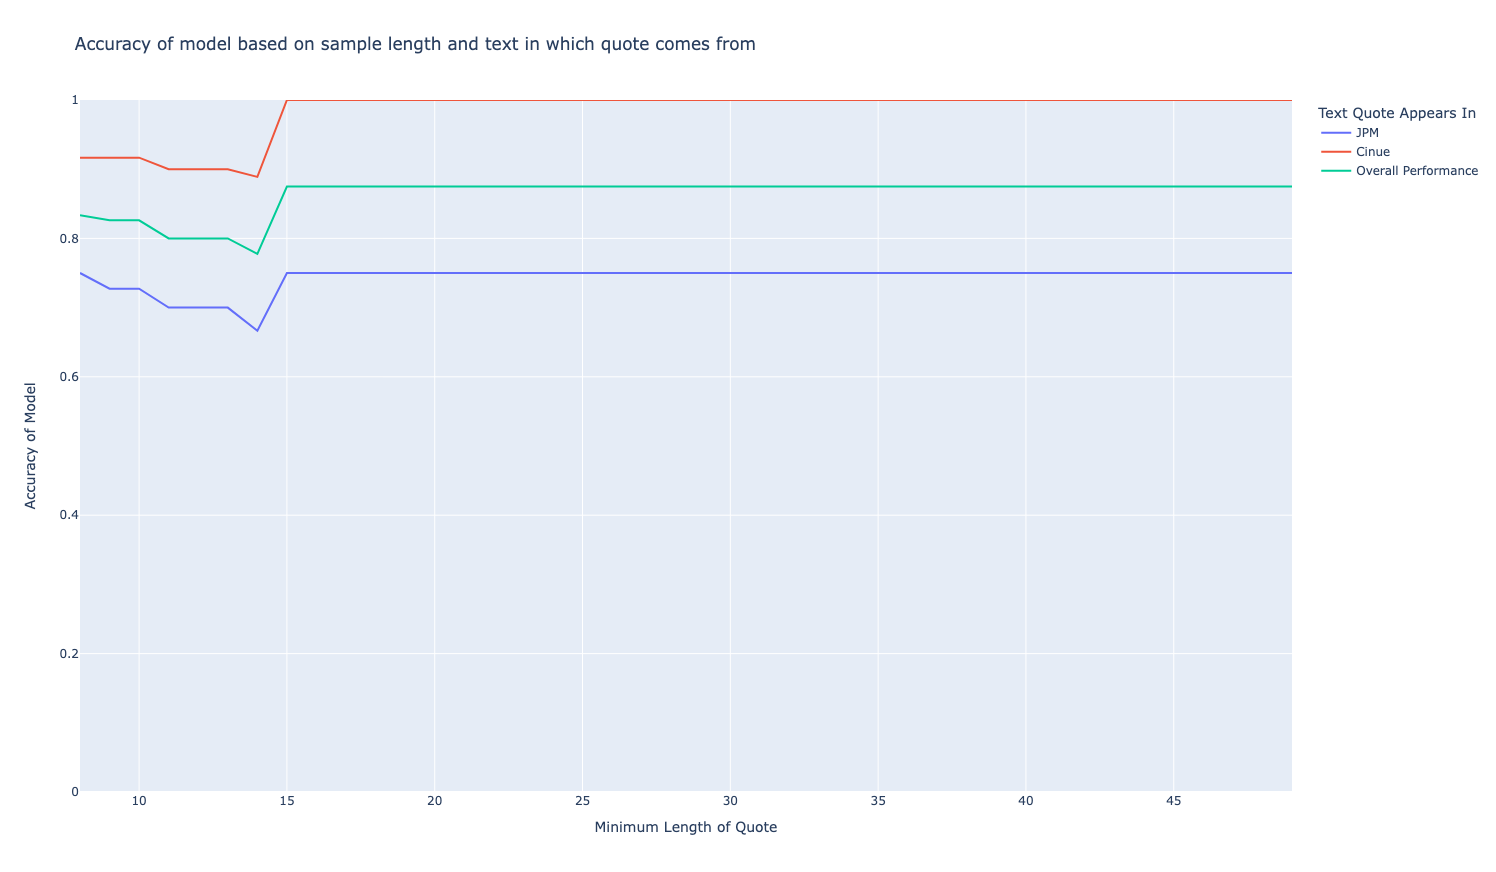

In [51]:
from IPython.display import Image, display
import IPython
# Load figure from html stored in the data file
metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 9: PCA showing style of _Jinpingmei_ vs. _Cinue_"
            ]
            
        }
    }
}
display(Image("./media/fig_9.png", width=1000), metadata=metadata)

The model quite consistently predicts that the origin of the shared quotes are from the _Cinüe_ rather than from _Jinpingmei_. While this is disappointing terms of the potential authorship of _Jinpingmei_, as we cannot use this as evidence that Li had a copy of the novel, it does comport well with the expectations we would have upon a careful expectation of the _Cinüe_ as a piece of dramatic criticism and upon considering the deeper layers of quotation that appear in these sections of _Jinpingmei_. There is also the slight complication of genre here: it may be that the algorithm focuses heavily on genre (the _Cinüe_ being largely full of poetry and drama, _Jinpingmei_ mostly consisting of prose). Given the layered nature of my approach, this doesn’t present too much of an issue in this particular case because I can trace this material further into the past, but it could potentially present roadblocks elsewhere..

## _Jinpingmei_ vs. the World

The final step I will take in evaluating this approach is to build models to compare _Jinpingmei_ against every earlier text in the corpus that has generated a result. In doing so I can assess general performance and highlight drawbacks to this approach. Figure 10 shows the predictions on earlier texts.

In [52]:
import numpy as np

def ignore_quote(text, set_min=20):
    if len(text) < 20 and ("下回分解" in text or "如何且听" in text):
        return True

    if len(text) < set_min:
        return True

def run_vs_many(file_1, label_1, sample_no, stop_words, looking_at, show_summary=True):
    with open('data/jpm_intermeta.tsv', 'r', encoding='utf8') as rf:
        meta = rf.read().split("\n")
        meta = [d.split("\t") for d in meta]
        meta = {d[0]:d for d in meta}
    
    # import alignment data
    if looking_at == "before":
        intertext_data = get_alignment_data('jpm_alignment.txt')
    elif looking_at == "unknown":
        intertext_data = get_alignment_data("suspicious_sequences.txt")

    intertext_data = [d for d in intertext_data if not ignore_quote(d[6].replace(" ", ""))]

    intertext_dict = {}

    for d in intertext_data:
        if d[1] not in intertext_dict:
            intertext_dict[d[1]] = []
        intertext_dict[d[1]].append(d)




    compiled_results = {"doc":[], "title":[], "cv":[], "sd":[], "avg_pred":[], "total_pred":[], "pred_sd":[],"guess":[], "basis":[], "no_quotes":[], "len_quotes":[]}

    pred_earlier = set()
    pred_jpm = set()
    miss_classed = []

    quote_prediction = {}
    quote_text = {}
    doc_1 = get_document(file_1)
    for i,(doc_2_file, intertext_data) in enumerate(intertext_dict.items()):

        doc_2 = get_document(doc_2_file)

        for s in stop:
            doc_2 = doc_2.replace(s, "")

        compiled_results["doc"].append(doc_2_file)
        compiled_results["title"].append(meta[doc_2_file][1])
        intertext_data = [d for d in intertext_data if (d[0] == file_1 and d[1] == doc_2_file)]


        # Load and then randomly divide the two texts
        sections, labels = get_text_and_labels(file_1, label_1, doc_2_file, doc_2_file, intertext_data) 

        # Vectorize the texts
        vectorizer, frequency_vectors = vectorize_texts(sections)

        # split data into training and testing sections following sklearn conventions
        X_train, X_test, y_train, y_test = train_test_split(frequency_vectors, labels, test_size=0.25)

        # set up classifier
        clf = SGDClassifier(loss="hinge",max_iter=50000)

        # perform 10 fold cross validation on the training set and print results
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        # print("Cross Validation scores:")
        # print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

        compiled_results["cv"].append(scores.mean())
        compiled_results["sd"].append(scores.std())

        # retrain classifier on full training data
        clf.fit(X_train, y_train)

        # predict on test data
        y_pred = clf.predict(X_test)

        # print confusion matrix and accuracy scores
        # print(confusion_matrix(y_test,y_pred))
        # print(accuracy_score(y_test,y_pred))

        # run on shared text, testing various lengths of text for accuracy

        #empty lists to gather info
        limits = []
        accuracy = []
        samples = []
        origins = []

        # get the shared quotes and the text they originate in
        shared_info = [[d[6].replace(" ", ""), label_1, int(d[4])] for d in intertext_data] + [[d[7].replace(" ", ""), doc_2_file, int(d[5])] for d in intertext_data]

        compiled_results["no_quotes"].append(len(shared_info))
        compiled_results["len_quotes"].append(sum([len(l) for l in shared_info]))



        shared_text = [d[0] for d in shared_info]

        if len(shared_text) > 0:
            # get shared vectors
            shared_frequencies = vectorizer.transform(shared_text)

            # get predictions
            shared_pred = clf.predict(shared_frequencies)



            for s,inf in zip(shared_pred[:len(shared_pred)//2], shared_info[:len(shared_pred)//2]):
                location = inf[2]
                loc_end = inf[2] + len(inf[0].replace(" ", ""))
                if (location, loc_end) not in quote_prediction:
                    quote_prediction[(location, loc_end)] = {}

                if s not in quote_prediction[(location, loc_end)]:
                    quote_prediction[(location, loc_end)][s] = 0
                    quote_text[(location, loc_end)] = inf[0].replace(" ", "")
                quote_prediction[(location, loc_end)][s] += 1

                for num in range(inf[2],inf[2]+len(inf[0])):
                    if s == "Jinpingmei":
                        pred_jpm.add(num)
                    else:
                        pred_earlier.add(num)



            # create results dictionary
            results = {p:list(shared_pred).count(p) for p in set(shared_pred)}

            if "Jinpingmei" in results:
                jpm_res = results["Jinpingmei"]
            else:
                jpm_res = 0
            # append results to lists

            accuracy.append(jpm_res/len(shared_pred))
            samples.append(len(shared_pred))    

        if len(accuracy) > 0:
            acc = np.array(accuracy).mean()
            compiled_results["avg_pred"].append(acc)
            if acc >= .75:
                compiled_results["guess"].append("jpm")
            elif acc <= .25:
                compiled_results["guess"].append("other")
            elif acc > .25 and acc < .5:
                compiled_results["guess"].append("other_unsure")
            elif acc > .5 and acc < .75:
                compiled_results["guess"].append("jpm_unsure")
            elif acc == .5:
                compiled_results["guess"].append("unsure")



            compiled_results["pred_sd"].append(np.array(accuracy).std())
            compiled_results["total_pred"].append(len(accuracy))
            compiled_results["basis"].append(len(accuracy))
        else:
            compiled_results["guess"].append("none")
            compiled_results["pred_sd"].append(0)
            compiled_results["total_pred"].append(len(accuracy))
            compiled_results["avg_pred"].append(0.5)
            compiled_results["basis"].append(0)


    df = pd.DataFrame(compiled_results)

    fig = px.scatter(df, x="avg_pred", y="no_quotes", hover_data=["doc", "cv", "title"], color="guess")
    fig.show()
    
    if show_summary:
        fig = px.histogram(df, x="avg_pred")
        fig.show()
        
def gen_fig_10():
    # Figure 10 generation
    file_1 = "25272"
    label_1 = "Jinpingmei"
    looking_at = "before"
    sample_no = 500
    stop_words = []

    run_vs_many(file_1, label_1, sample_no, stop_words, looking_at)

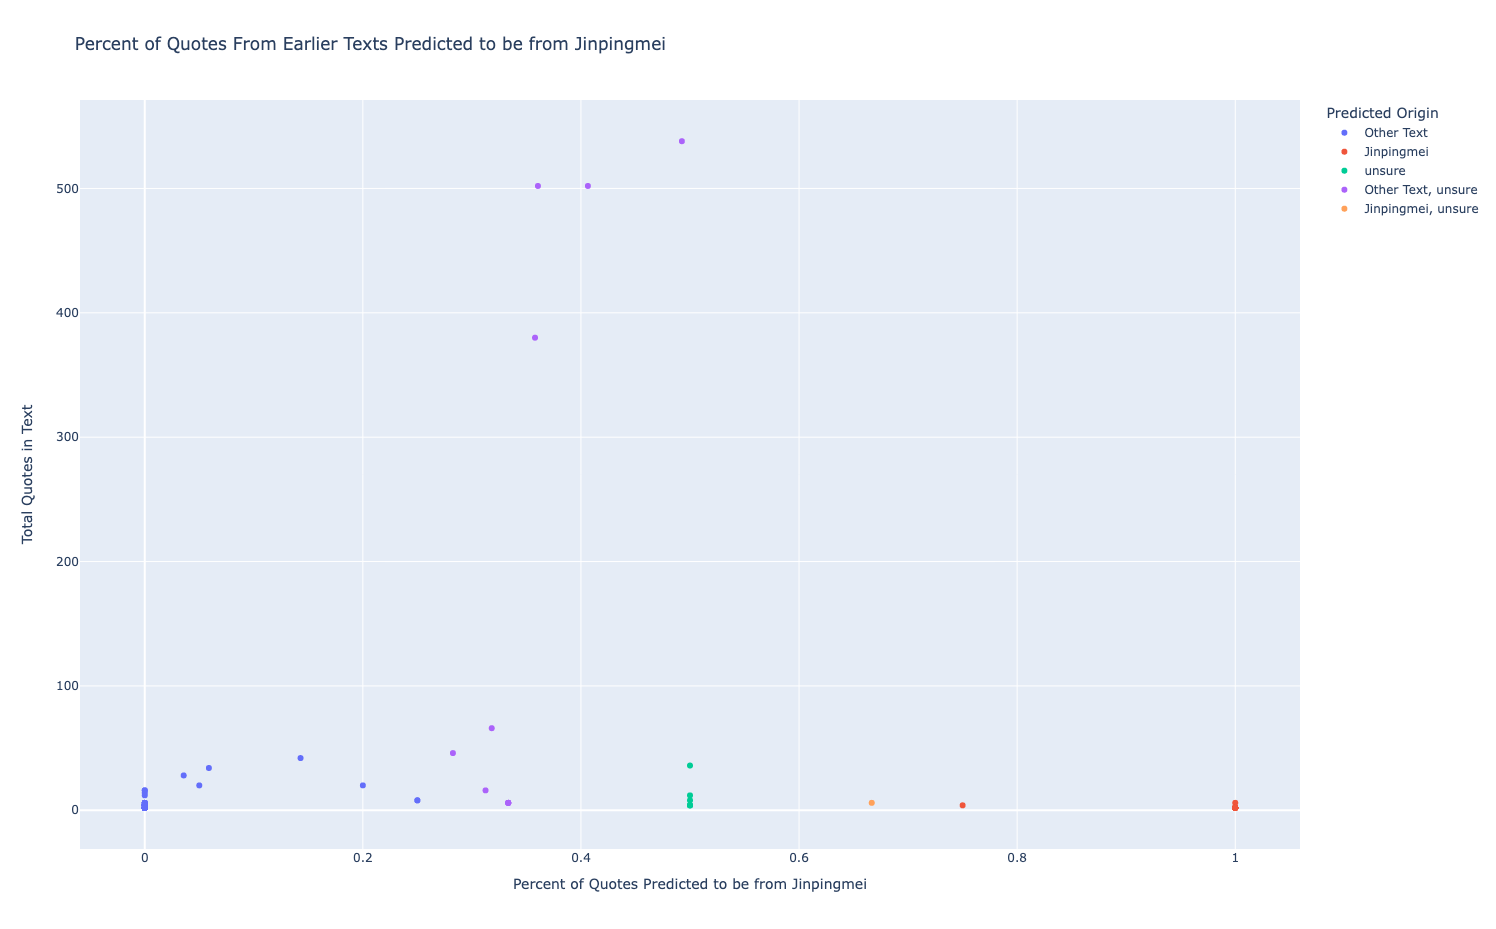

In [53]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 10: Percent of perdictions that indicate a quote is from _Jinpingmei_ among earlier documents."
            ]
            
        }
    }
}

display(Image("./media/fig_10.png", width=1000), metadata=metadata)

The models work well and accurately predict that quotes from 88 of 108 texts are most likely to be the source of the quotes than _Jinpingmei_, at least in cases where quotes are at least 20 characters long. 16 texts were incorrectly predicted to be quoting _Jinpingmei_, and the results were evenly split for another 4 texts. This is decent performance but slightly lower than I expected given the performance of the models when I was conducting cross-validation. Interestingly, cases of mistaken origin are not random and stem from certain quotes shared widely across the corpus. These mistaken quotations are generally not original to either _Jinpingmei_ or the other text. Instead, they have an origin somewhere else. Additionally, they are often quotes from poetry. In the single case where the quote does in fact originate in the other text, it is from the _Yingying zhuan_ 鶯鶯傳 (_Tale of Yingying_) and is a phrase that contains many characters shared with the names of people in _Jinpingmei_ (“待月西厢下近风户半开拂墙花影动疑是玉人来”). Additionally, in the case of _Yingying zhuan_, there is relatively little material to train the model, as it is a quite short story (just short of 3,000 total characters go into training the model). Importantly, there are very few cases where my approach completely fails to identify a source text prior to _Jinpingmei_ for quotes tracable to works circulating before the novel.

This illustrates that one cannot treat intertextuality in a naïve fashion. The model can only tell us, based on the input vectors, which document the string appears most similar to, even when the actual origin of the quote might be represented elsewhere in the corpus (just not in the document at hand). It makes sense to find ways of increasing the fidelity of the results. One option is to train a multi-class model based on every text that contains a given quote. While an important step to take eventually, this is not necessarily the best first approach. As the number of classes in a model increases the more complex, and often less reliable, the model becomes. 

Instead a useful first step in trying to trace the ultimate source of quotes within the novel might be to narrow the search space as much as possible before even building any models. One heuristic for dealing with heavily layered text is to follow Hanan’s example by looking for instances of the overlap and identifying the work where the longest matching quotes appear. If four different texts all share the same substrings, but one of them encompasses all the rest, this is likely to be the actual origin of the quote. Thus it may not even be necessary to compare _Jinpingmei_ against a text if it is clearly not the origin of the material. The quote from the _Qingpingshantang huaben_ that appears at the beginning of this article (and the novel itself) is a good example: the intertextuality algorithm identifies three texts in which the opening poem: the _Qingpingshantang huaben_, the _Quan song ci_ 全宋詞, and the _Shuofu_ 說郛. Yet the _Qingpingshantang huaben_ quote continues beyond the poem and then later intersects with quotes from even more works as shown in Figure 11.

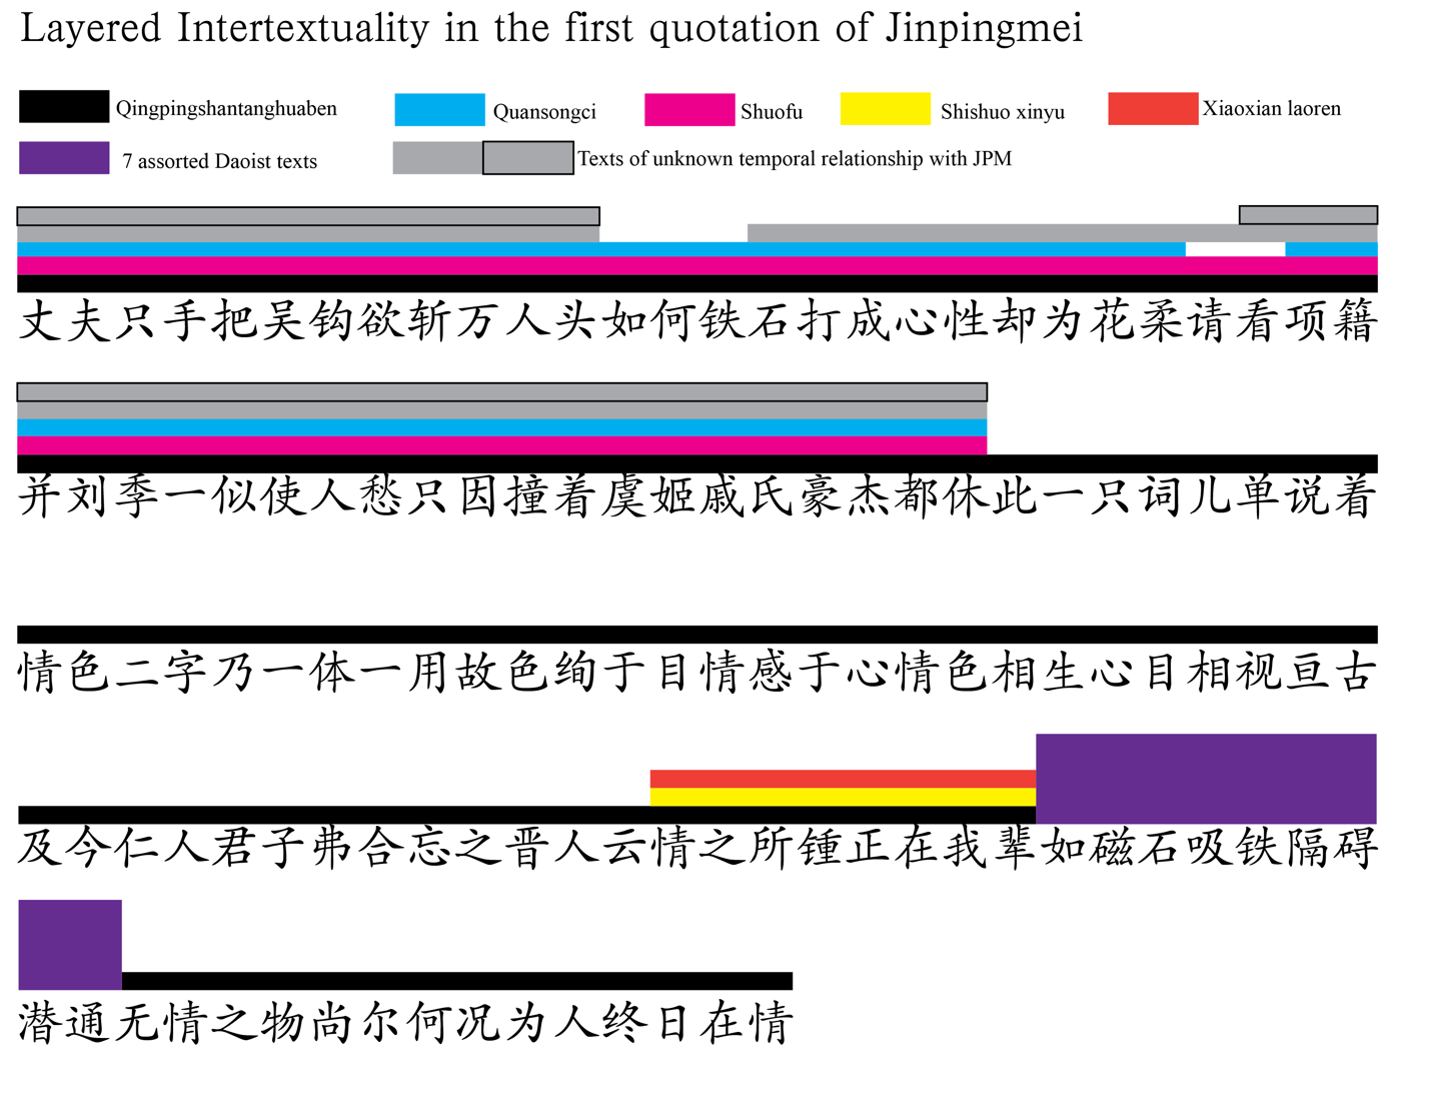

In [54]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 11: Layered Intertextuality in the first quotation of _Jinpingmei_"
            ]
            
        }
    }
}

display(Image("./media/fig_11.png", width=1000), metadata=metadata)

This process of assessing the nested nature of quotes can significantly narrow the unknown/contemporary[^1] quotation space that I need to test.[^2] There are still numerous cases where quotes appear in varying lengths across many of the same texts, which can make disambiguating them quite difficult. But identifying a single work to compare against _Jinpingmei_ significantly eases the complexity of building a taxonomy of source materials. Where I can, instead of searching every nested quote in the corpus, ignoring material embedding within longer shared quotes and only focus on the longest cases. There are also in cases where all a quotations appears identically in multiple cases, and in these instances I retain everything and simply run parallel models against all of them. In doing so I can produce the final figure for unknown quotations within _Jinpingmei_, which fills out an initial, but sketchy, source map for the novel.

[^1]: Unknown in the case of the metadata I have associated with my corpus. Fortunately, it is quite possible to find more detailed information about many of the Ming dynasty texts. The main complication is the somewhat hazy date of completion of the novel itself.

[^2]: I should note that this approach is not perfect. It may well be the case that the author of Jinpingmei used multiple versions of the same text to create his narrative. There are, for example, cases where the Yongxi Yuefu 雍熙乐府 encompasses quotes shared with the Baixuezhai xuanding yuefu 白雪斋选订乐府 and vice versa.

In [55]:
# Figure 12 generation
def gen_fig_12():
    file_1 = "25272"
    label_1 = "Jinpingmei"
    looking_at = "unknown"
    sample_no = 500
    stop_words = []



    run_vs_many(file_1, label_1, sample_no, stop_words, looking_at, show_summary=False)


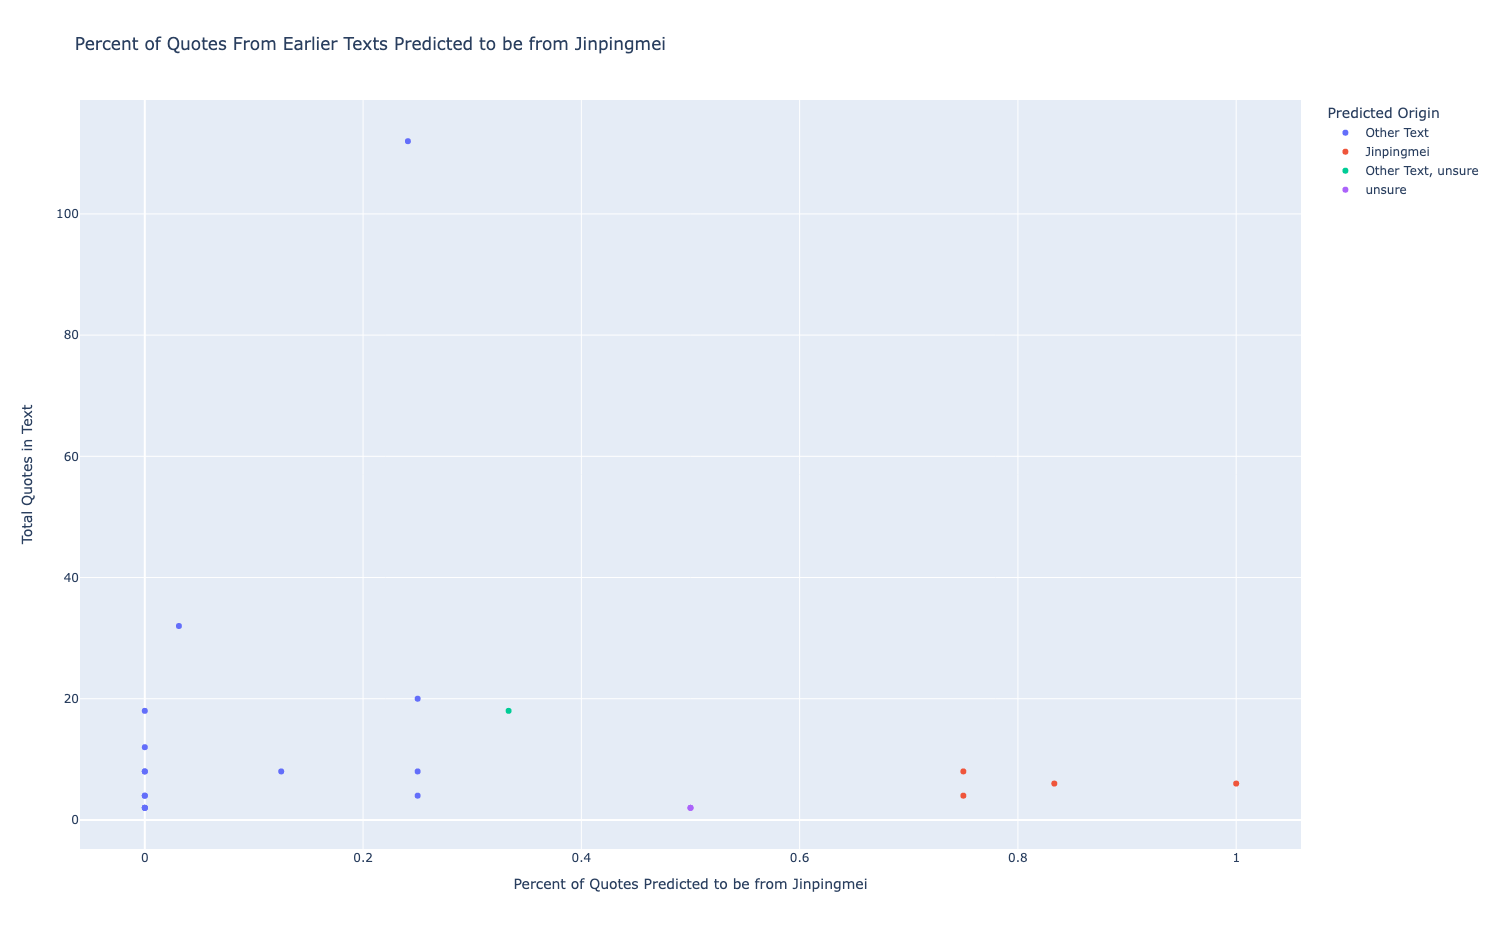

In [56]:
from IPython.display import Image, display

metadata={
    "jdh":{
        "module":"object",
        "object":{
            "type":"image",
            "source":[
                "figure 12: Percent of perdictions that indicate a quote is from _Jinpingmei_ among unknown documents."
            ]
            
        }
    }
}

display(Image("./media/fig_12.png", width=1000), metadata=metadata)

## Conclusion

One can, and should, approach these results with some amount of suspicion. I expect the model to struggle on strings with certain characteristics. Short quotes, quotes that contain characters appearing in people’s names, and a multitude of other factors can all affect the output. Thus rather than being an ending point, this approach opens a departure point for broader projects. Which of these quotations actually does originate in _Jinpingmei_? Can we weed out incorrect answers with careful scrutiny of the shared quotation material? After all we can use this approach to make statements about systems of texts, but our confidence plummets when making claims about specific relationships. Would more sophisticated models clear up the inconsistencies we see here? Finally, as these results are all carefully assessed, can these predictions help us narrow down the likely date of completion of _Jinpingmei_? What might that tell us about the author of the novel?

While still experimental, this approach to deriving source materials in _Jinpingmei_ may become widely useful in Chinese literary and historical scholarship. As the extent of available corpora increase and machine learning models become ever more easily accessible approaches like this will become an important part of many scholars’ toolboxes. There is significant utility in being able to computationally assess the nature of intertextuality. The likely direction of shared intertextuality can reveal significant new insights into the development of various literary, historical, and cultural phenomena. It opens more space for using network analysis and may reveal much about the intellectual community behind the productions of unusual works like _Jinpingmei_. 


<div class="cite2c-biblio"></div>